# Exploratory data analysis (EDA)


## Dataset: Used Car Price

### 1. Problem Statement

#### Some Background Information

 -This is Import and export data available by principle commodity and country wise for 
3 years from Apr'2014 to Mar'2017.
- Ministry of Commerce and Industry, Govt of India has published these datasets in Open Govt Data Platform India portal under Govt. Open Data License - India.

- The objective of this data analysis is to better understand the imports and exports by India related with differnt countries and variety of products.
- The analysis can help business to understand their potential, target markets in import and export business.
- This analysis can help in demand forcasting depend upon countries, regions, products and goods and their values
- This analysis can help to understand Top countries by growth percentage, growth of export and import.

### Description of the Dataset

#### Importing packages        

In [1]:
#Importing the packages
import os
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.impute import SimpleImputer

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [2]:
#Importing the data
missing_values = ["n/a", "na", "--",'null']
data=pd.read_csv(r'C:\Users\PKK\Desktop\EDA\used-cars-price-prediction\Dataset\train-data.csv',na_values=missing_values)

## 3. Data Profiling

### 3.1 Understanding the  Dataset

### General Information about Dataset

In [3]:
#Importing methods from predefined class
from dataset_info import Dataset_inspection,Outlier_analysis
Dataset_inspection(data).dataset_info()


Shape of Dataset (6019, 14)

Number of Rows 6019 
Number of Columns:  14

Feature Names : 
 ['Unnamed: 0' 'Name' 'Location' 'Year' 'Kilometers_Driven' 'Fuel_Type'
 'Transmission' 'Owner_Type' 'Mileage' 'Engine' 'Power' 'Seats'
 'New_Price' 'Price']

Information about Datatypes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-nul

### Removing Identifiers and Unnecessary Features

In [4]:
#Defining the function to preprocess the data, deriving new feature and chaning the datatypes


def data_preprocesing(data):
    data.drop(columns=['Unnamed: 0'],inplace=True)

    #Changing the datatypes
    for col in data[['Name','Location','Fuel_Type','Transmission','Owner_Type']]:
        data[col]=data[col].astype('category')

    #Renaming the columns as per the requirements
    data.rename(columns={'Year':'Model_Year'},inplace=True)    

    #deriving new feature
    data['Number_of_years_used']=2020-data['Model_Year']
    data.drop(columns=['Model_Year'],inplace=True)

#calling the function
data_preprocesing(data)

In [5]:
#Defining the function to clean the features 
def data_cleaning(data):
    data['Mileage_km/pl']=data['Mileage'].str.split(' ').str[0]
    data['Power_bhp']=data['Power'].str.split(' ').str[0]
    data['Engine_cc']=data['Engine'].str.split(' ').str[0]
    data['Car_Brand']=data['Name'].str.split(' ',n=1).str[0].astype('category')
    data['Car_Model_Name']=data['Name'].str.split(' ',n=1).str[1].astype('category')
    data.drop(columns=(['Engine','Power','Mileage','Name']),inplace=True)

#calling the function
data_cleaning(data)

### Missing Data Analysis and Imputation

Any missing datapoints in dataset: True
Columnwise missing data present in the dataset
               total_missing_count  percentage_missing datatype
Seats                           42            0.697790  float64
New_Price                     5195           86.310018   object
Mileage_km/pl                    2            0.033228   object
Power_bhp                       36            0.598106   object
Engine_cc                       36            0.598106   object

 
 Total percentage of missing data : 6.30266062231505  % 


 Total percentage of rows affected by missing data : 86.32663233095198 % 



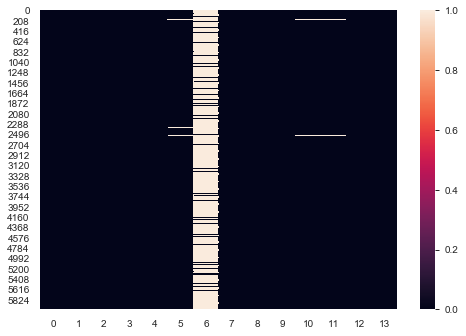

In [6]:

#Importing Methods from predefined class
Dataset_inspection(data).missing_data_analysis()

Missing data imputed sucessfully


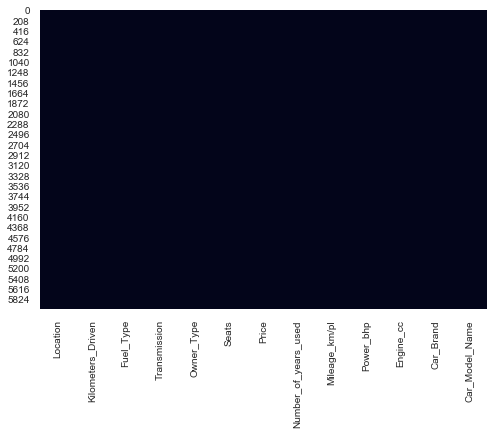

In [7]:
#Defining function for missing data handling

def missing_data_handling(data):
    
    #New price column has 86% percent of missing values
    #remiving this column
    data.drop(columns=(['New_Price']),inplace=True)

    #replacing the null values as np.nan
    data.replace({'null':np.nan},inplace=True)

    #Imputing the missing values using simple imputer
    #Imputation strategy is mean for the numerical columns
    from sklearn.impute import SimpleImputer
    imputer=SimpleImputer(missing_values=np.nan,strategy='mean',verbose=0)
    
    #Imputing missing data in numerical columns with mean
    for col in data[['Power_bhp','Seats','Mileage_km/pl','Engine_cc']]:
        data[col]=imputer.fit_transform(data[[col]])
    
    print('Missing data imputed sucessfully')
    sns.heatmap(data.isnull(),cbar=False)

    #All missing values are imputed and data is cleaned
    
#calling the function
missing_data_handling(data)

In [8]:
#seperating datatypes for better analysis of data according to numerical and categorical datatypes

data_categorical=data.select_dtypes(['category'])
print('Categorical_data :',data_categorical.shape)

data_numerical=data.select_dtypes(['int64','float64'])
print('Numerical_data :',data_numerical.shape)

Categorical_data : (6019, 6)
Numerical_data : (6019, 7)


Name of Feature : Kilometers_Driven
Skewness of Feature : 58.72466188582937


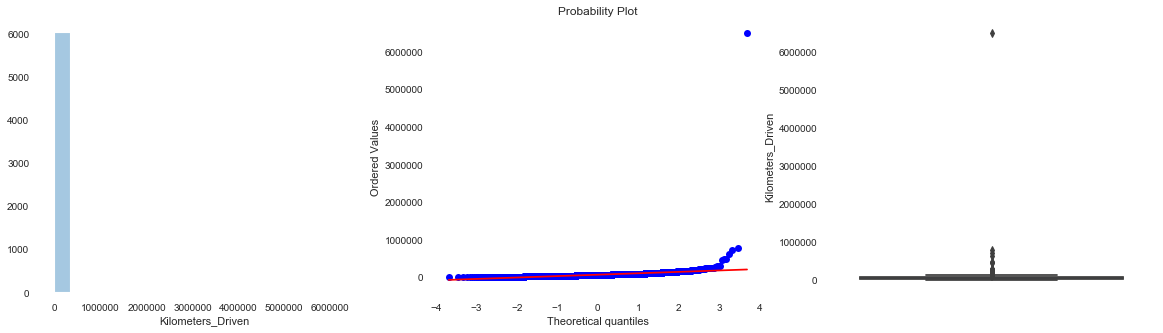

Name of Feature : Seats
Skewness of Feature : 1.8422275322145867


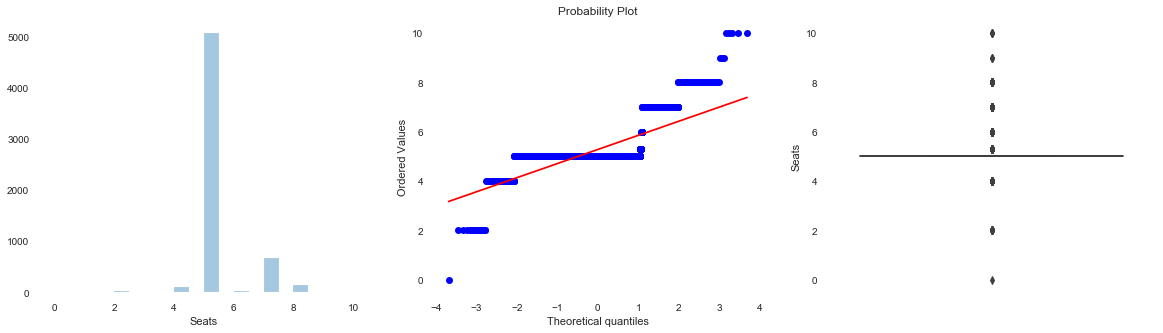

Name of Feature : Price
Skewness of Feature : 3.3352319876668415


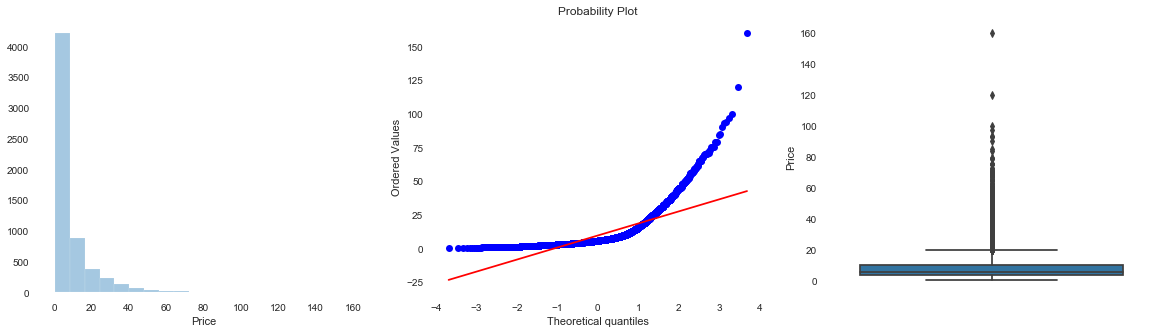

Name of Feature : Number_of_years_used
Skewness of Feature : 0.8458021355295812


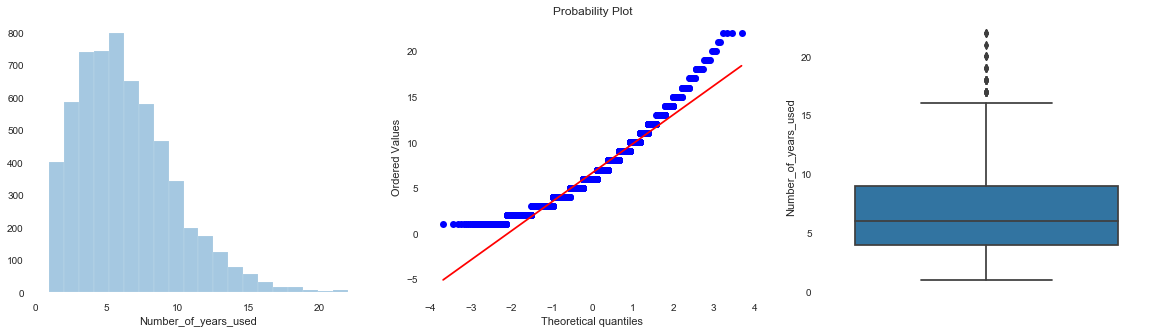

Name of Feature : Mileage_km/pl
Skewness of Feature : -0.4318138538804253


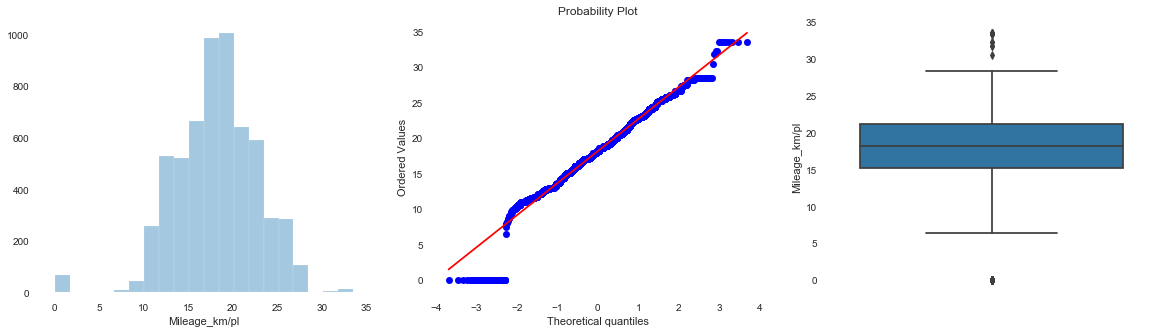

Name of Feature : Power_bhp
Skewness of Feature : 1.9396487800494213


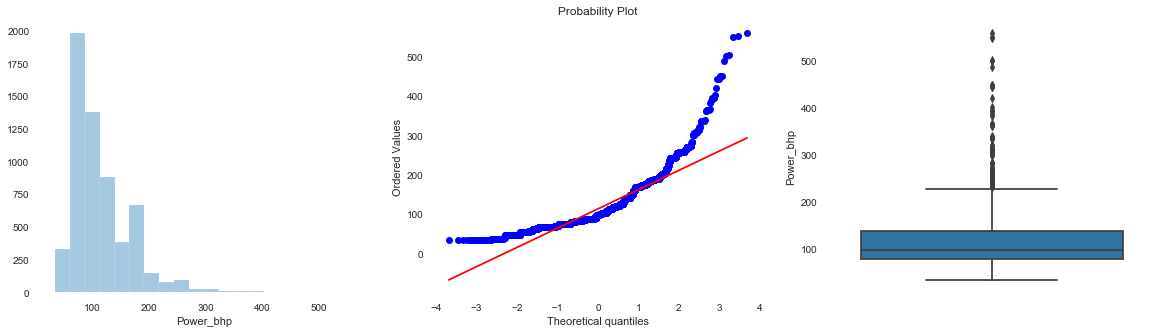

Name of Feature : Engine_cc
Skewness of Feature : 1.4257419266688478


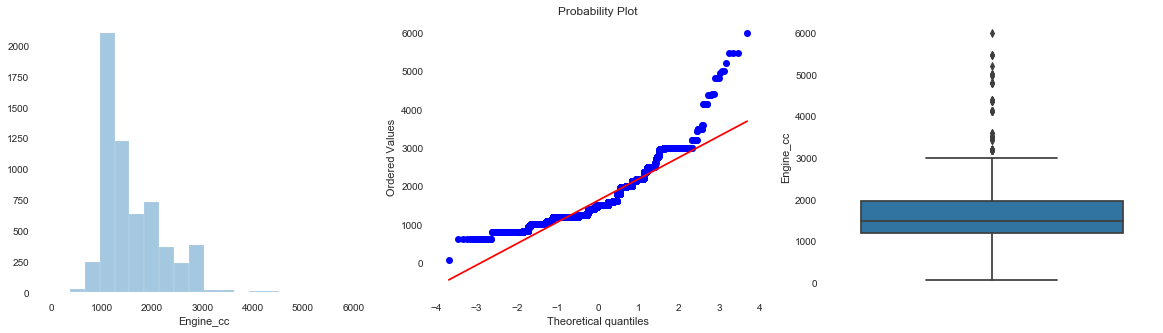


Skewness Table: 
           Feature_name  Outliers_Number  Percentage_of_Outliers   Skewness
0     Kilometers_Driven              202                3.356039  58.724662
1                 Seats             1005               16.697126   1.842228
2                 Price              718               11.928892   3.335232
3  Number_of_years_used               50                0.830703   0.845802
4         Mileage_km/pl               82                1.362353  -0.431814
5             Power_bhp              239                3.970759   1.939649
6             Engine_cc               61                1.013457   1.425742 





In [9]:
#calling methods from predefined classes
Outlier_analysis(data_numerical).graphical_outlier_analysis()

## Statistical Data Analysis

In [12]:
#calling methods from predefined classes
from statistical_analysis import Statistical_analysis

for col in data_categorical: 
    Statistical_analysis.Significance_tests(data).two_way_anova('Price~Location+Fuel_Type+Transmission+Owner_Type+Car_Brand+Car_Model_Name',col)

Two way ANOVO test results: 
ANOVA table: 
                       sum_sq      df           F        PR(>F)
Location          4065.323753    10.0   47.390672  3.318864e-90
Fuel_Type          261.680017     4.0    7.626202  4.057257e-06
Transmission       559.807314     1.0   65.258382  8.545265e-16
Owner_Type        1016.364075     3.0   39.493514  3.722262e-25
Car_Brand       109117.581485    30.0  424.005224  0.000000e+00
Car_Model_Name  557744.552791  1875.0   34.676224  0.000000e+00
Residual         35419.885466  4129.0         NaN           NaN

Test Results for feature: Location
alpha: 0.05 
p_value for feature: Location: 3.3188636195635373e-90 
p_value < 0.05 
null hypothesis is true : 
all the sample means are equal or the factor did not have any significant effect on the results, reject the alternate hypothesis 



Two way ANOVO test results: 
ANOVA table: 
                       sum_sq      df           F        PR(>F)
Location          4065.323753    10.0   47.390672  3.31886

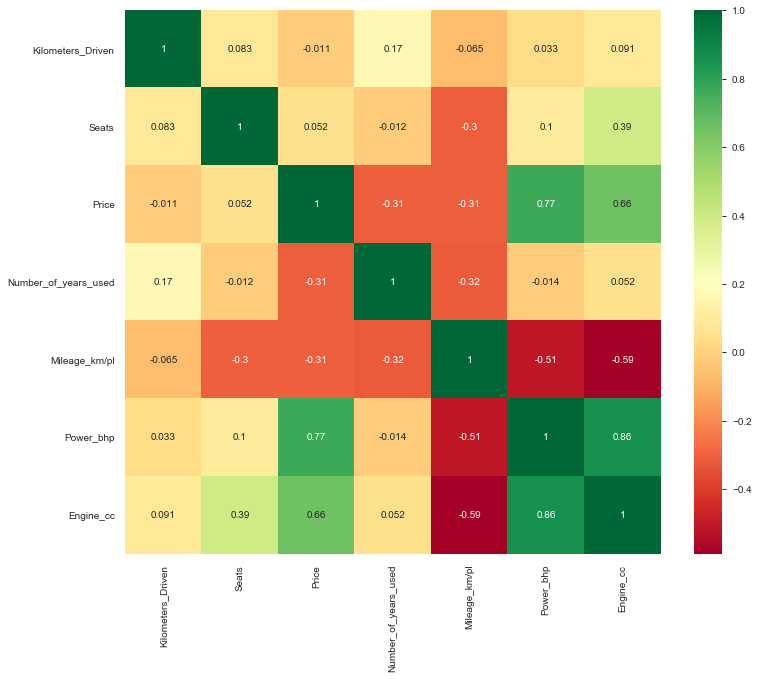

In [14]:
#finding the correlations
#importing predefined methods 
from plots import Graphical_analysis
Graphical_analysis.Numerical_data_analysis(data_numerical).correlation_plot()

## Graphical Data Analysis

<blockquote>Univariate Analysis of Numerical Features

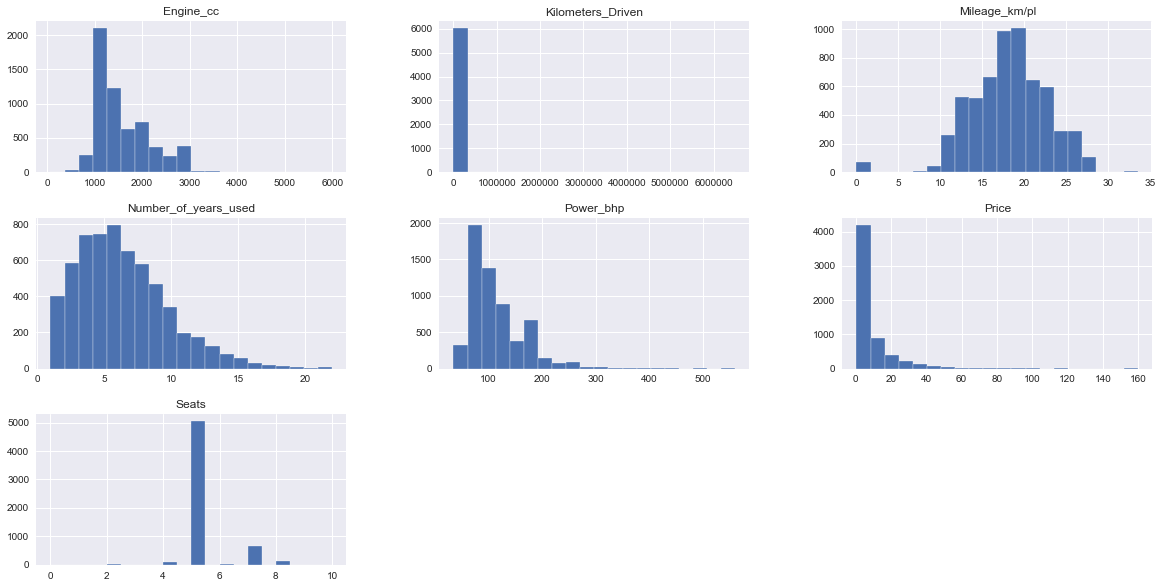

In [16]:
#EDA Analysis
#Univariate EDA Analysis
#Calling predefined methods

Graphical_analysis.Numerical_data_analysis(data_numerical).univariate_analysis_histogram()

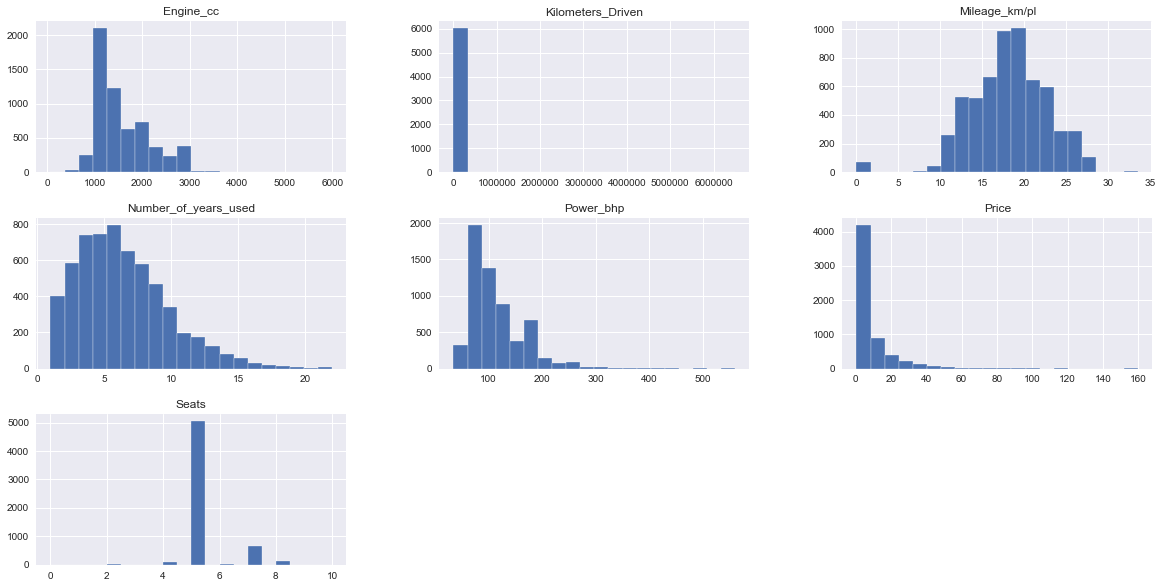

In [17]:
Graphical_analysis.Numerical_data_analysis(data_numerical).univariate_analysis_histogram()

<blockquote>Bivariate Analysis of Numerical Features

### Scatter Plots

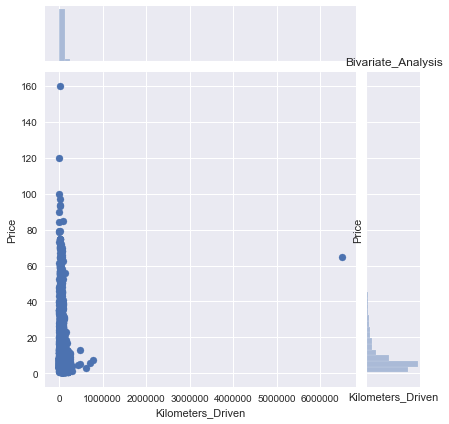

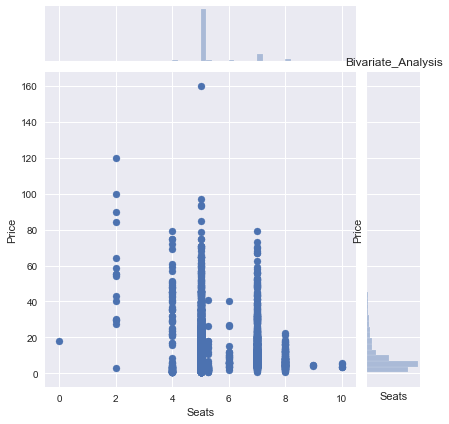

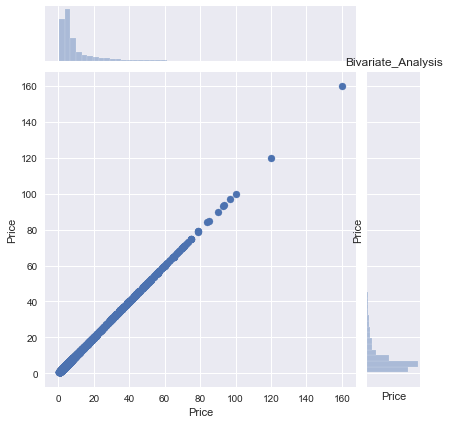

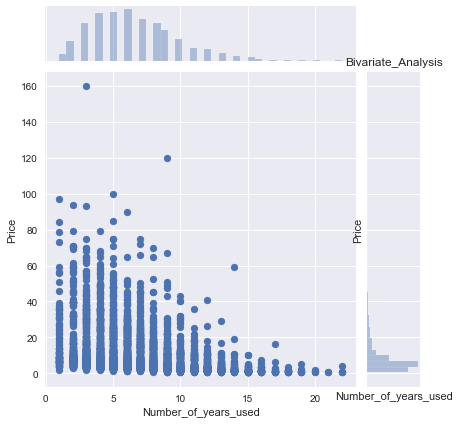

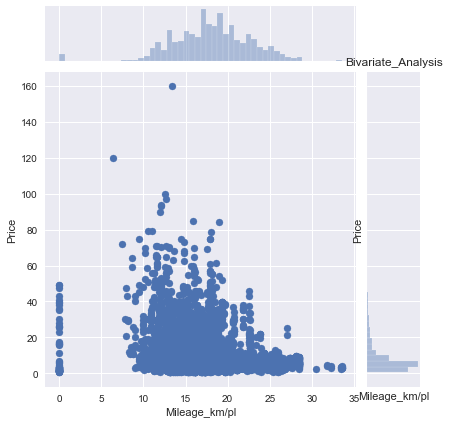

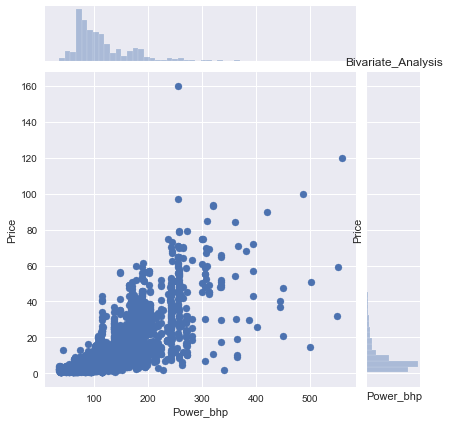

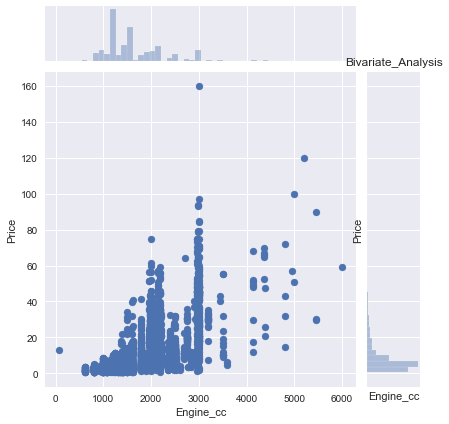

In [18]:
#calling predefined methods
#scatter plots between numerical features and price
Graphical_analysis.Numerical_data_analysis(data_numerical).bivariate_analysis_scatterplot('Price')

<blockquote>Univariate Analysis of Categorical Features

Percentage of datapoints present in class : 

 Mumbai        13.125104
Hyderabad     12.327629
Kochi         10.815750
Coimbatore    10.566539
Pune          10.333943
Delhi          9.204187
Kolkata        8.888520
Chennai        8.207343
Jaipur         6.861605
Bangalore      5.947832
Ahmedabad      3.721548
Name: Location, dtype: float64


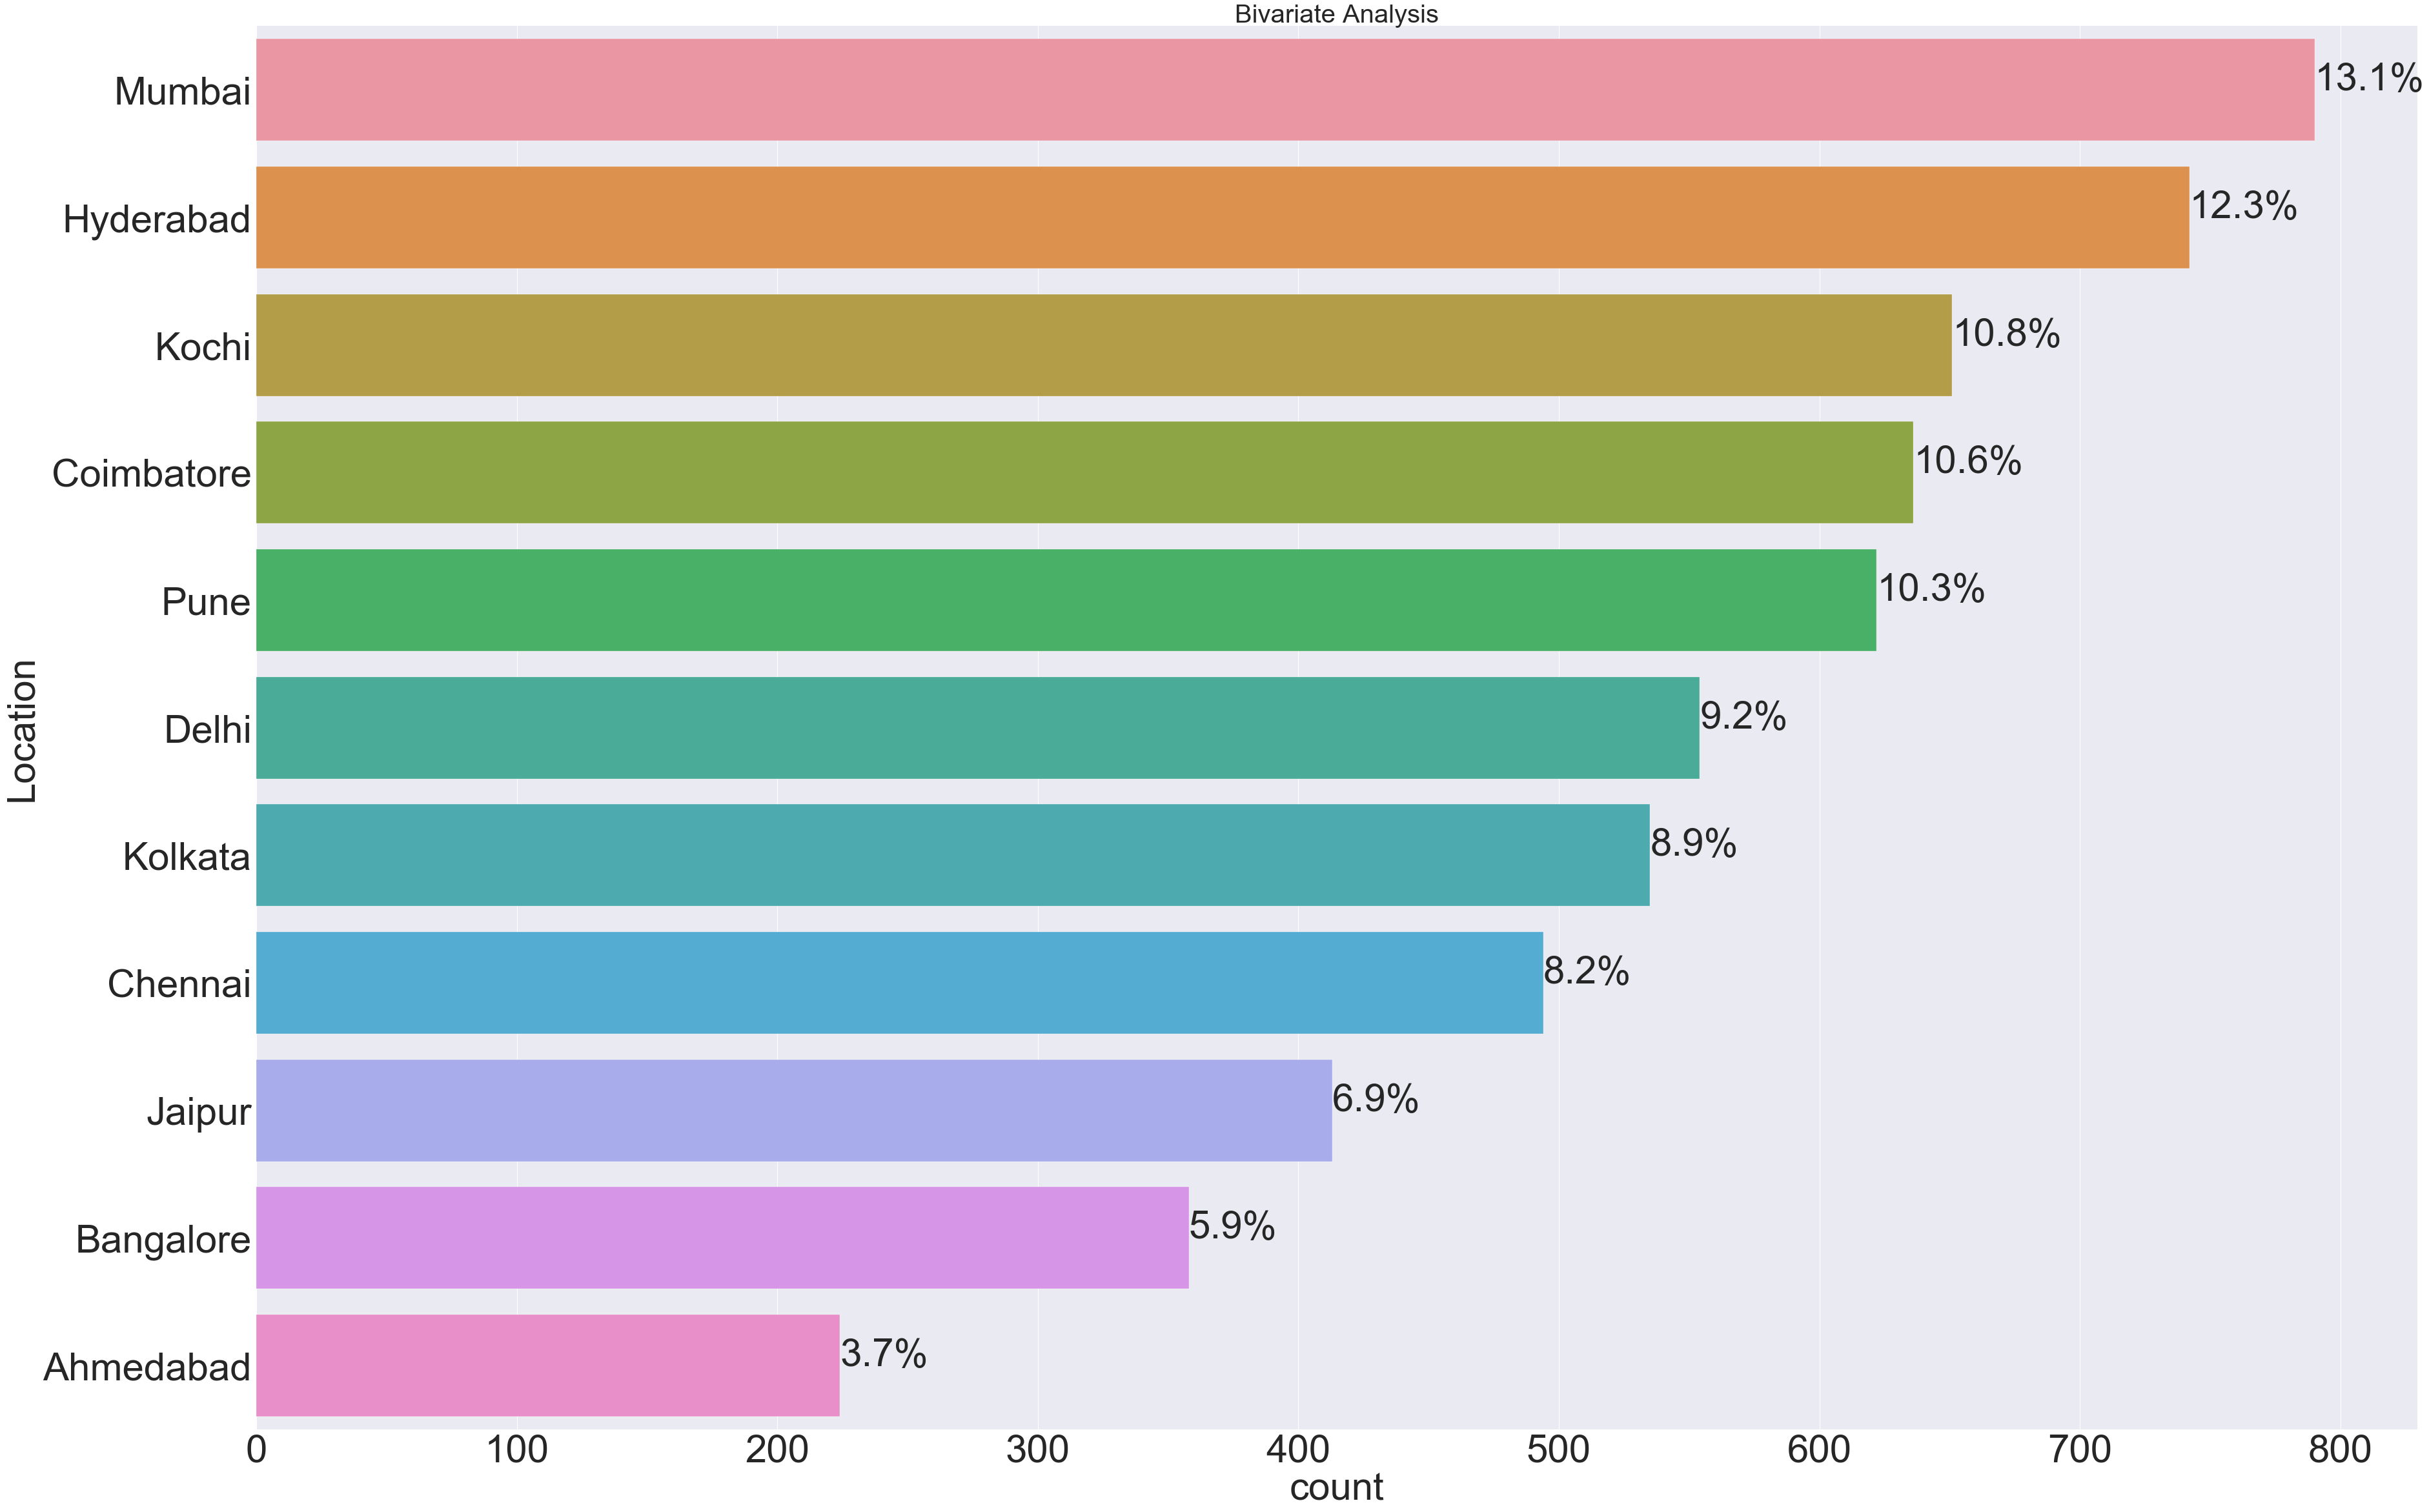

Percentage of datapoints present in class : 

 Diesel      53.248048
Petrol      45.622196
CNG          0.930387
LPG          0.166141
Electric     0.033228
Name: Fuel_Type, dtype: float64


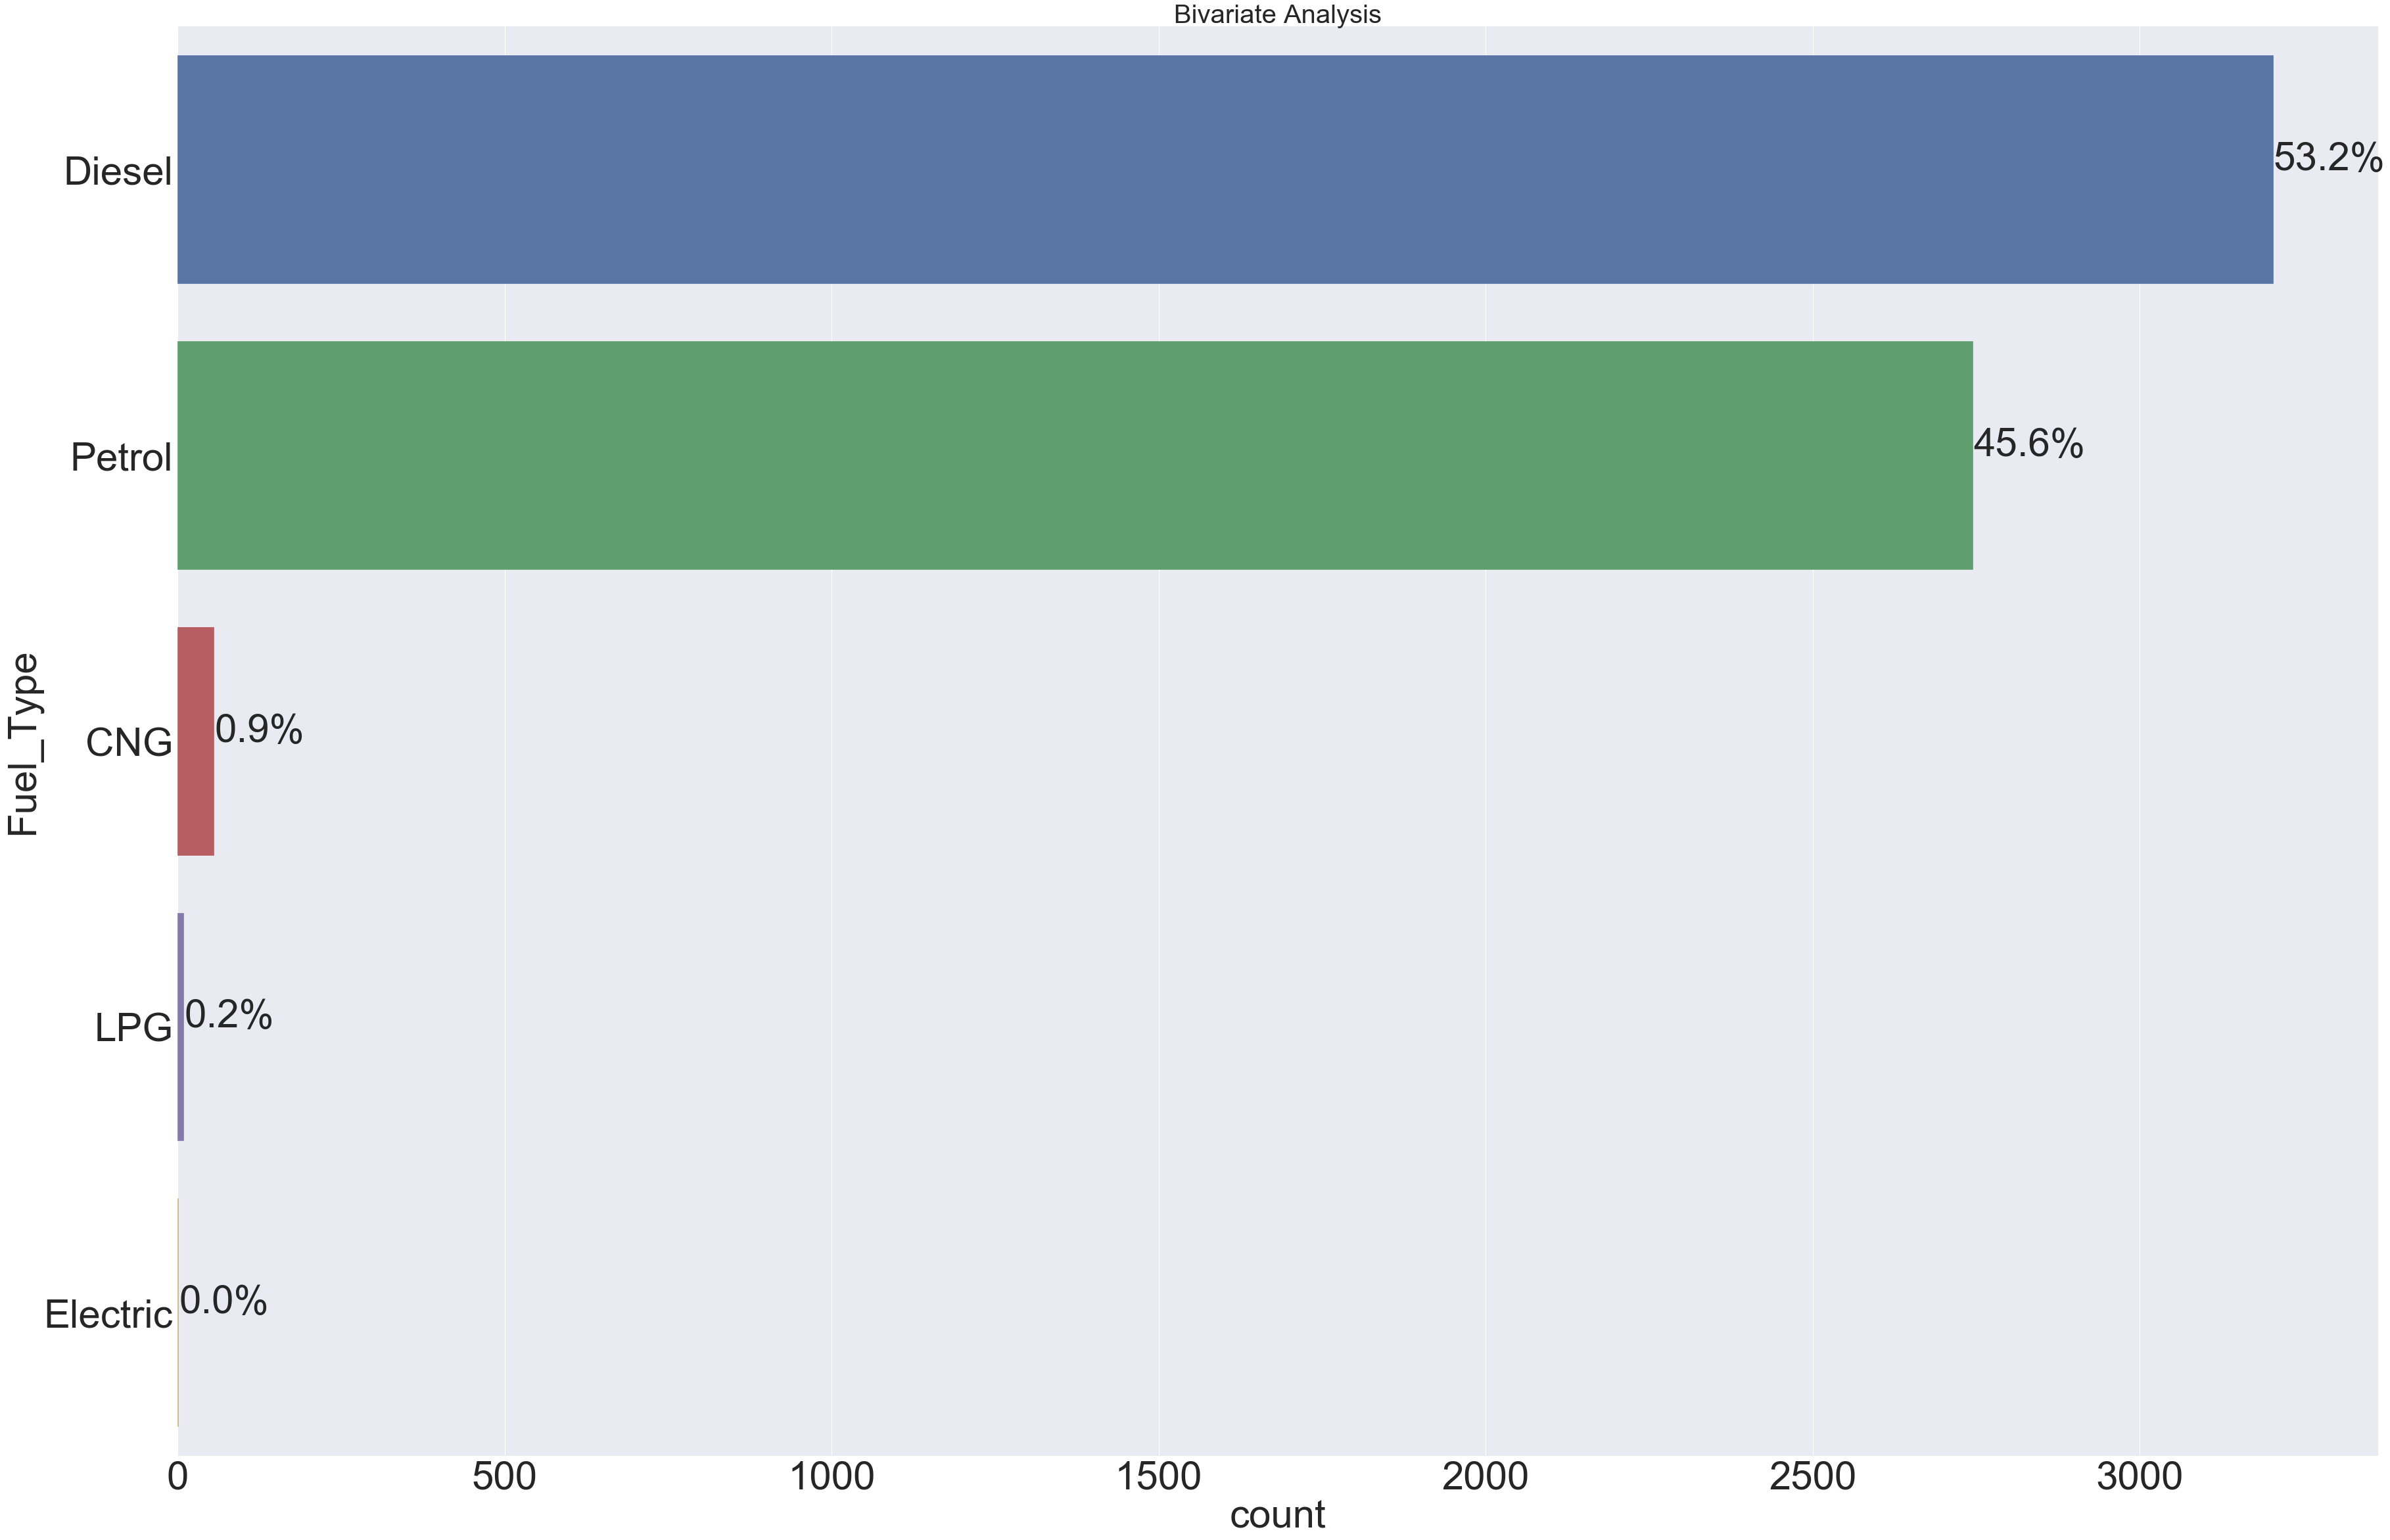

Percentage of datapoints present in class : 

 Manual       71.423825
Automatic    28.576175
Name: Transmission, dtype: float64


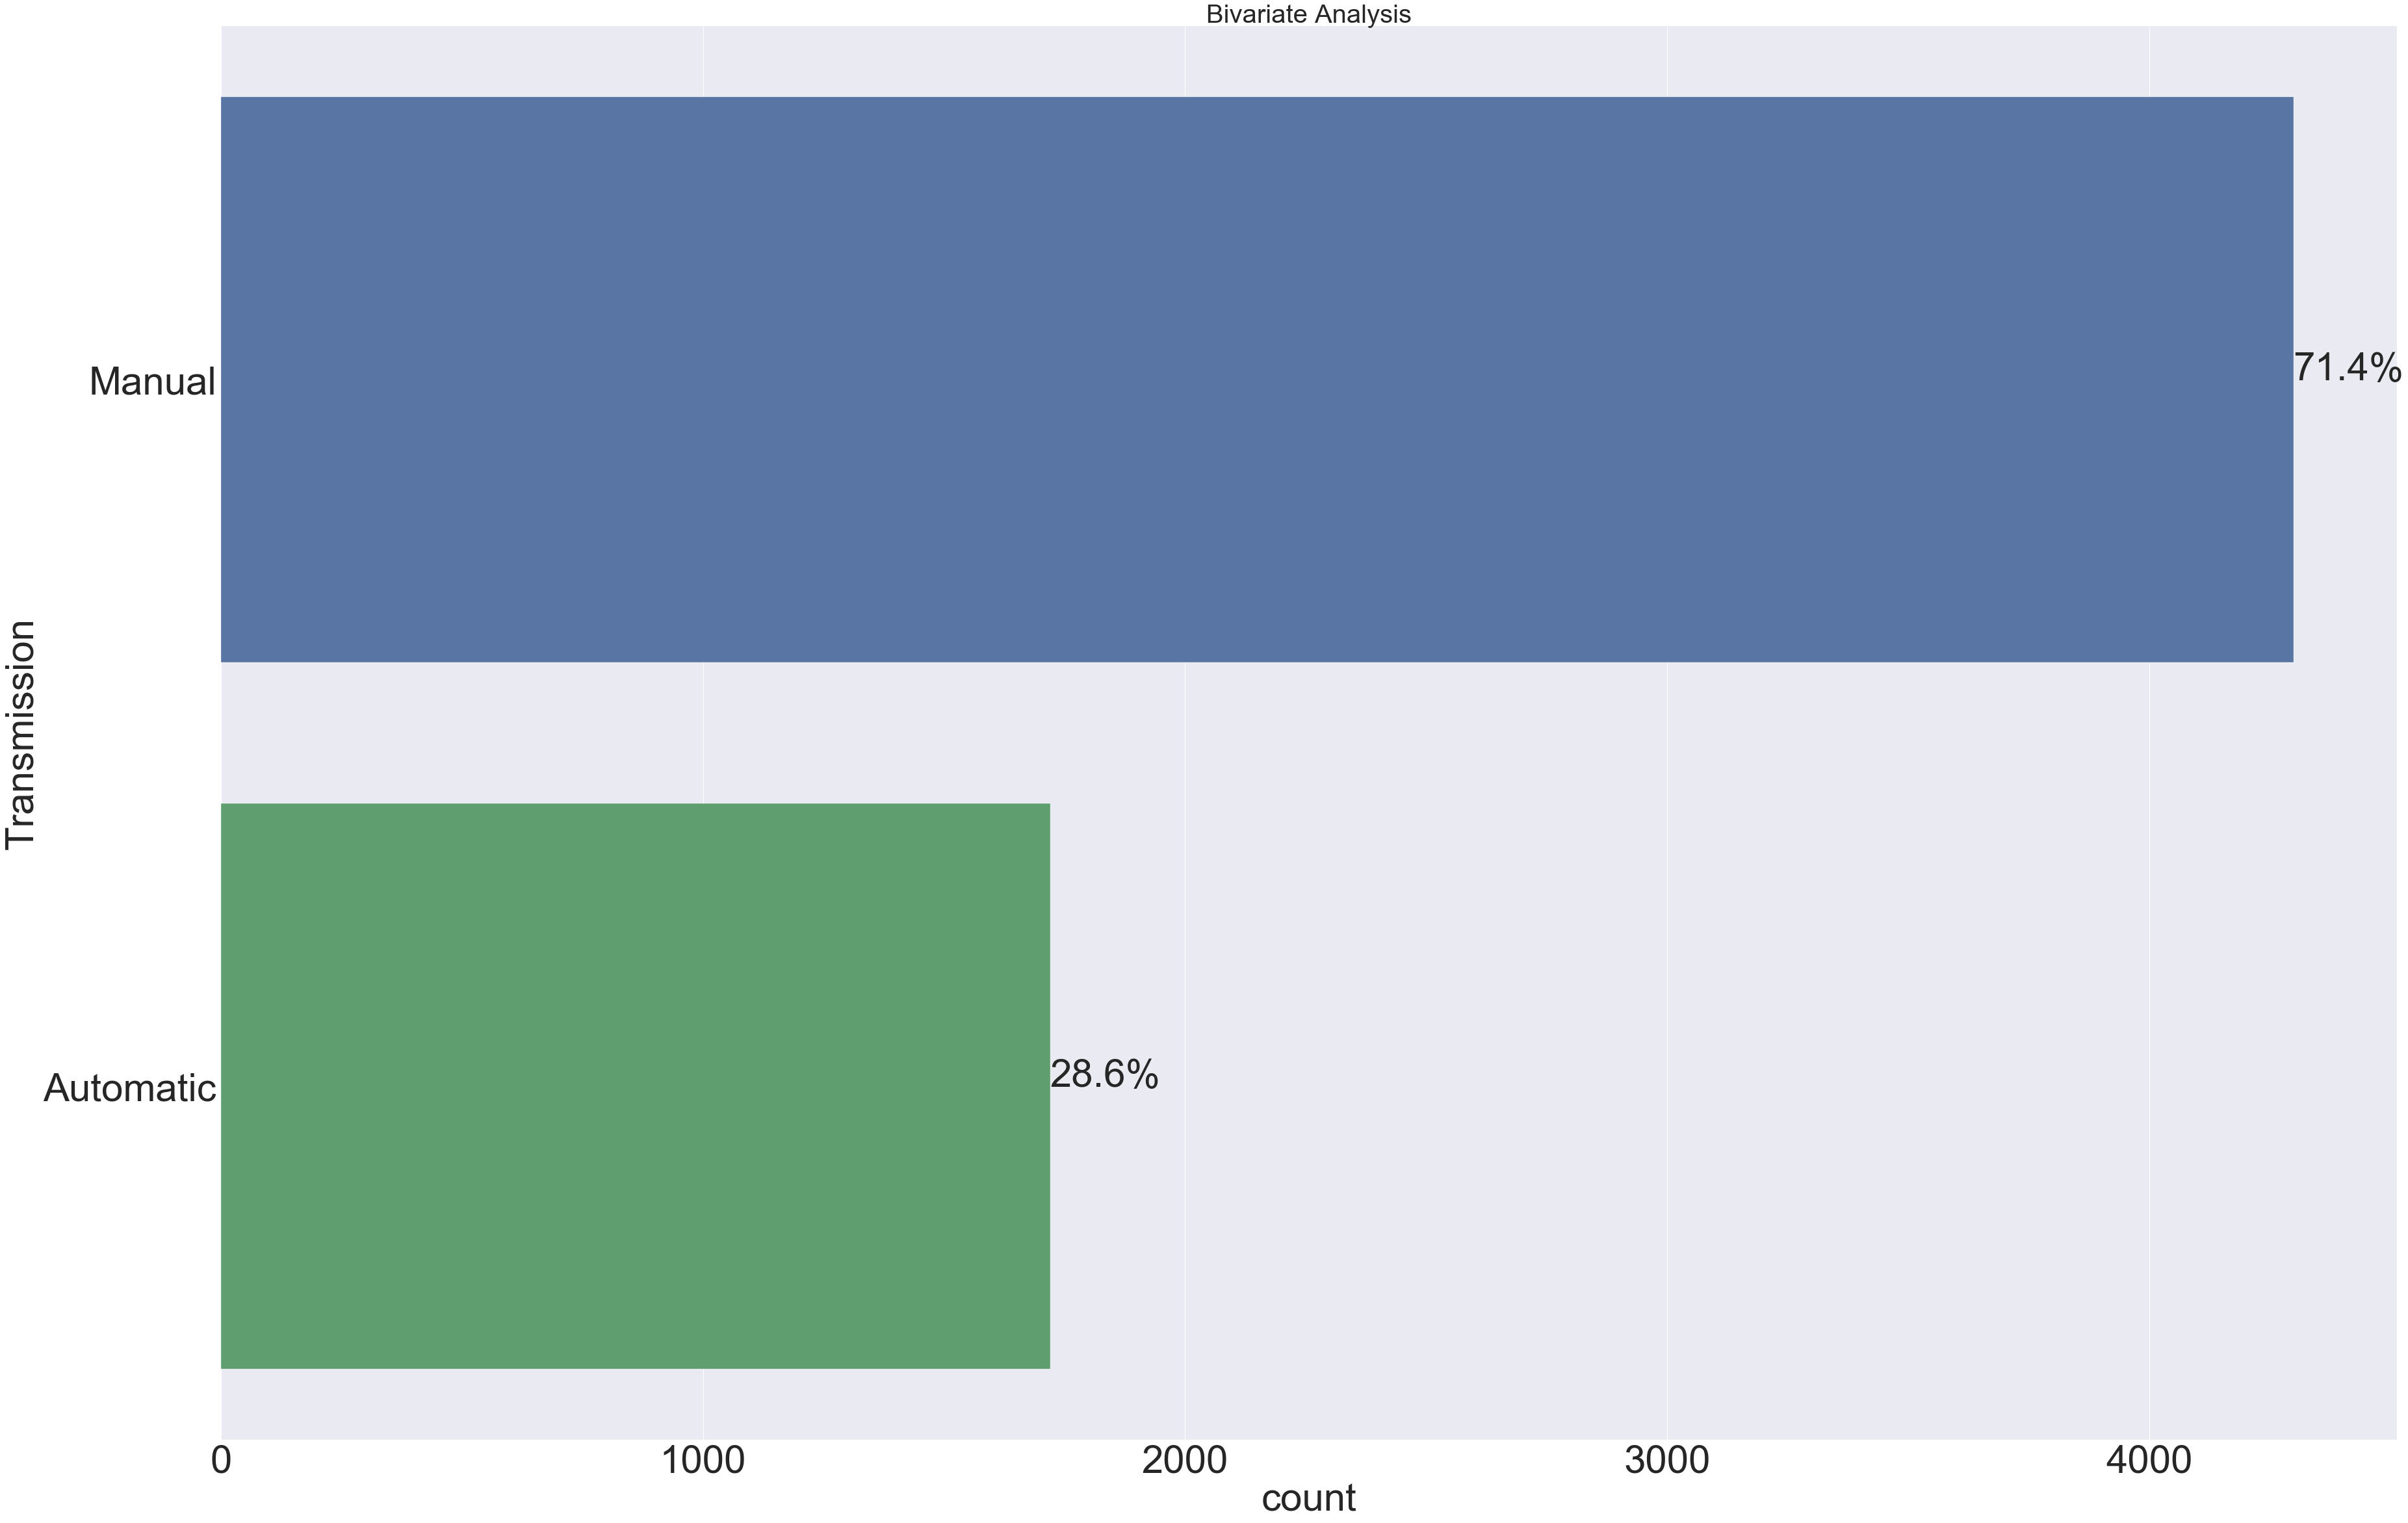

Percentage of datapoints present in class : 

 First             81.890680
Second            16.082406
Third              1.877388
Fourth & Above     0.149526
Name: Owner_Type, dtype: float64


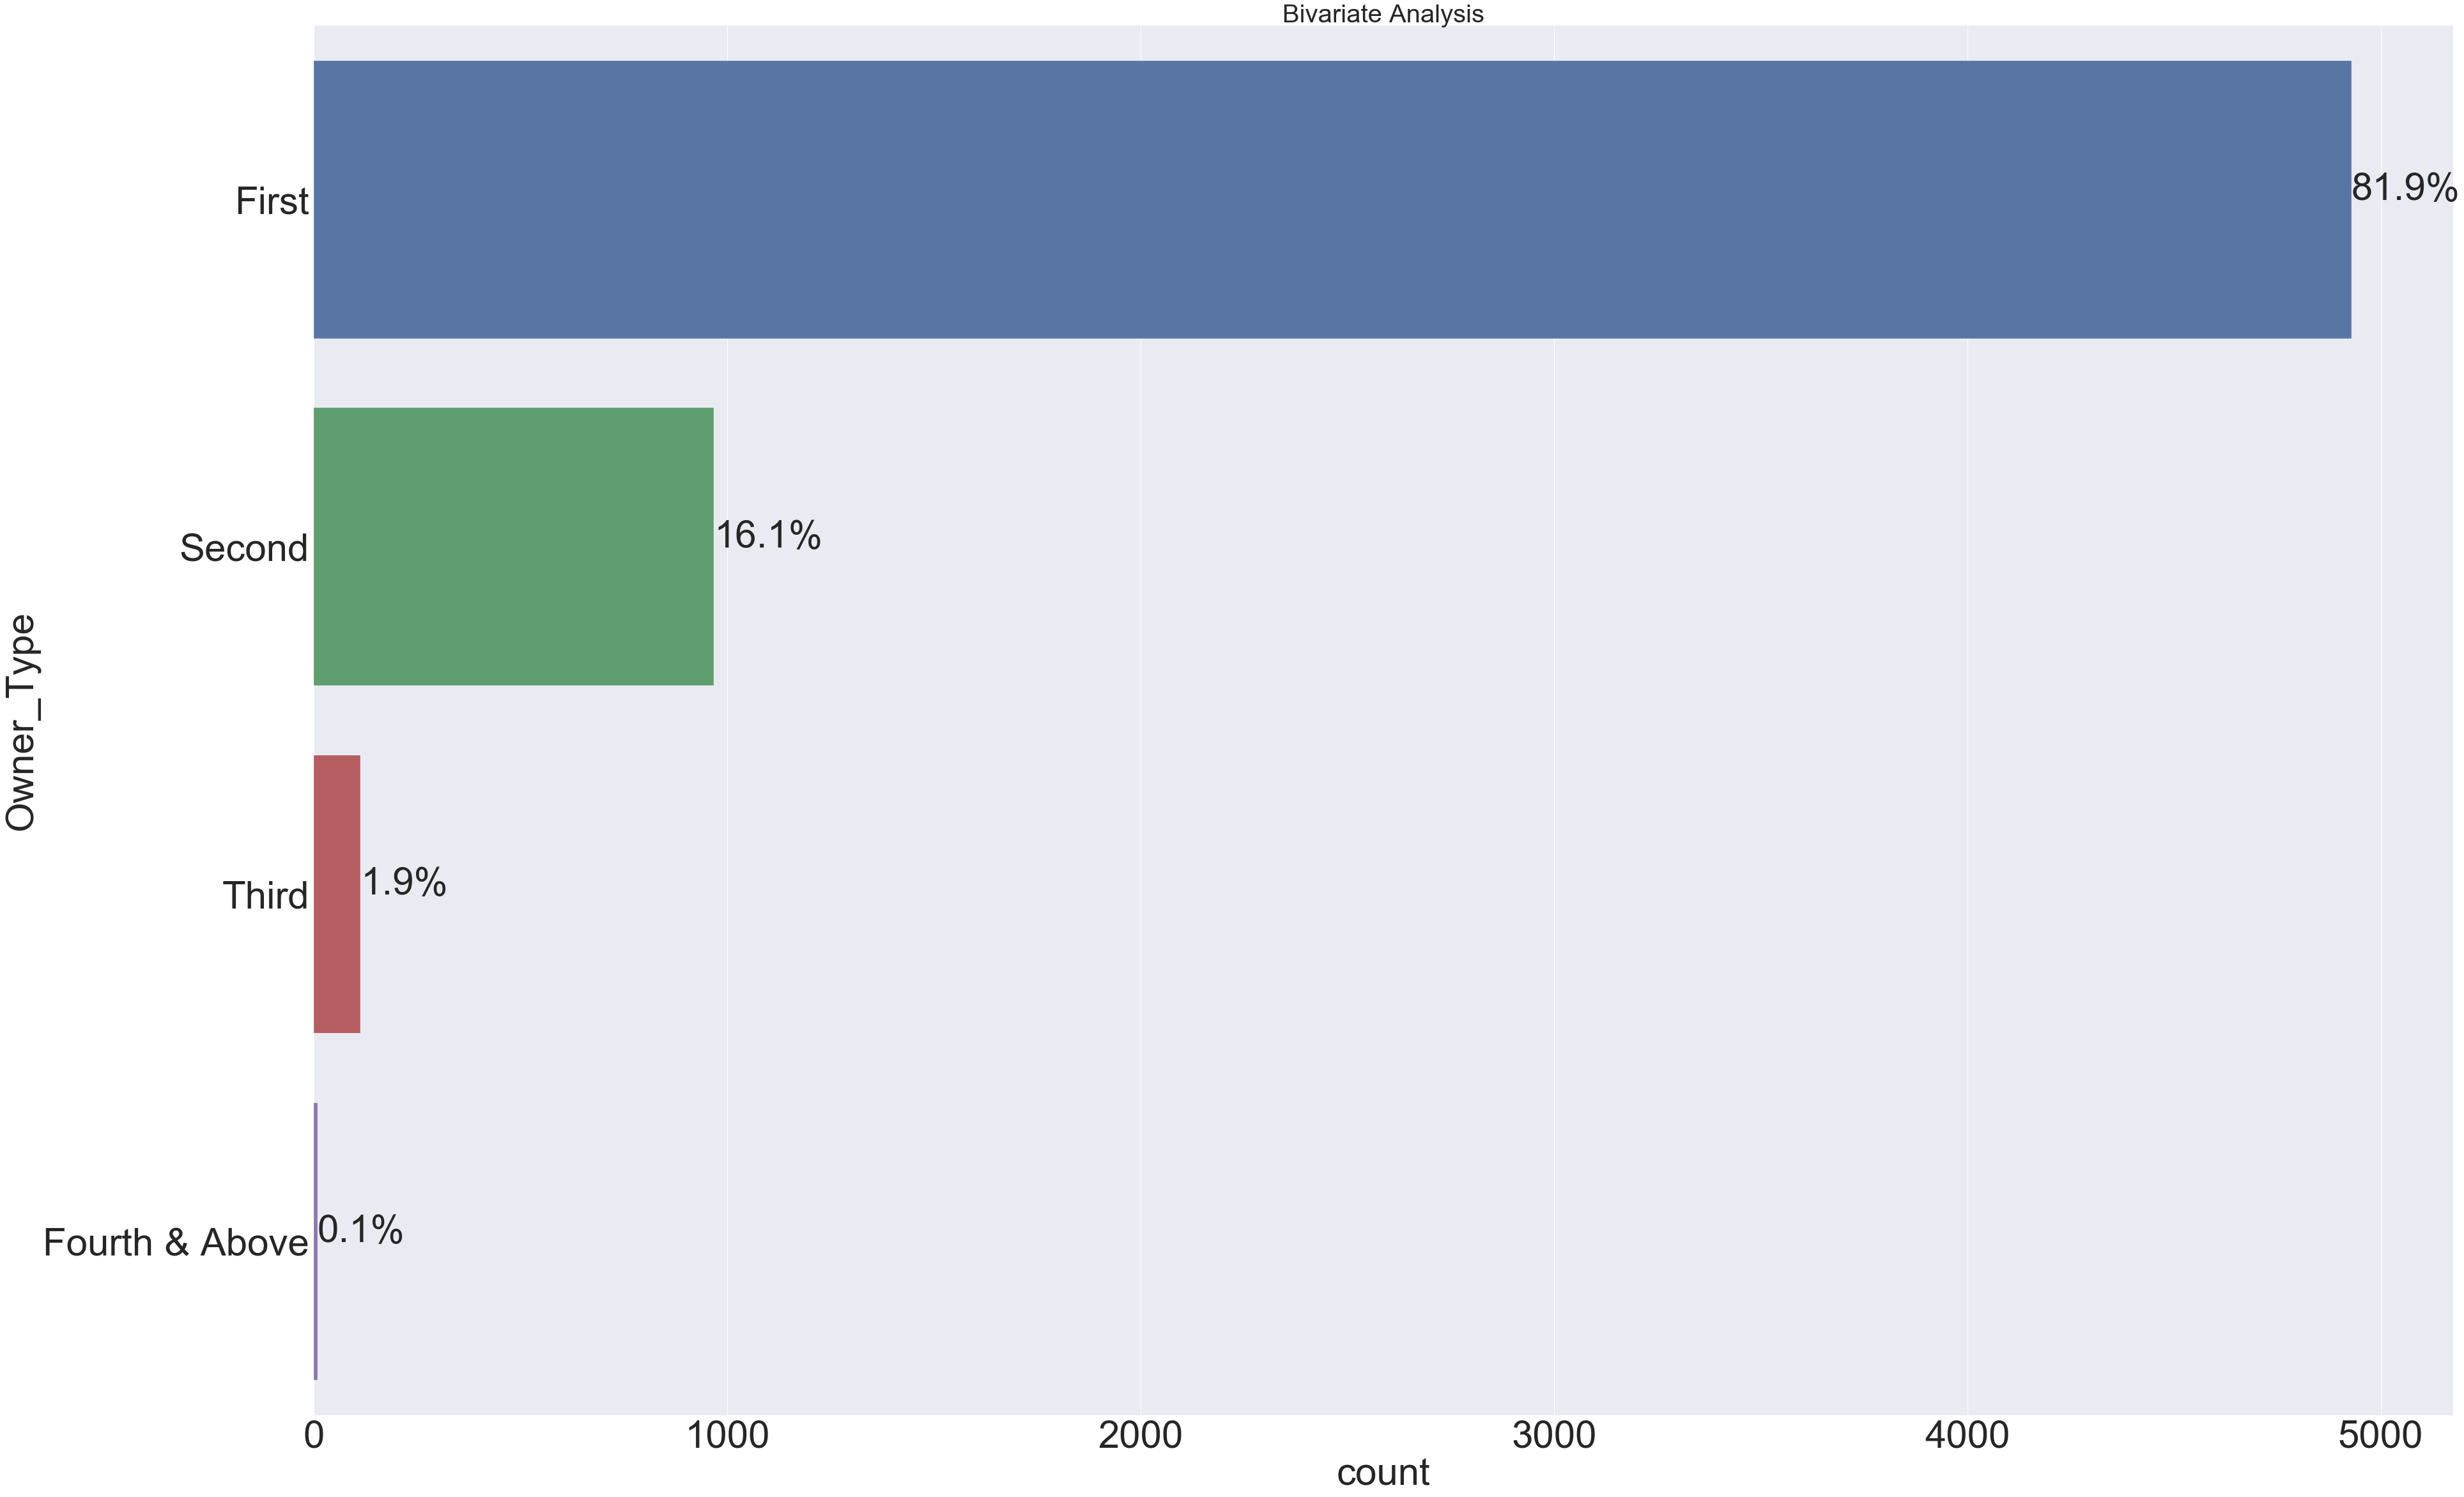

Percentage of datapoints present in class : 

 Maruti           20.119621
Hyundai          18.391759
Honda            10.101346
Toyota            6.828377
Mercedes-Benz     5.283270
Volkswagen        5.233427
Ford              4.984217
Mahindra          4.519023
BMW               4.435953
Audi              3.920917
Tata              3.090214
Skoda             2.874232
Renault           2.409038
Chevrolet         2.010301
Nissan            1.511879
Land              0.996843
Jaguar            0.664562
Fiat              0.465194
Mitsubishi        0.448579
Mini              0.431965
Volvo             0.348895
Porsche           0.299053
Jeep              0.249211
Datsun            0.215983
Force             0.049842
ISUZU             0.033228
Bentley           0.016614
Lamborghini       0.016614
Isuzu             0.016614
Smart             0.016614
Ambassador        0.016614
Name: Car_Brand, dtype: float64


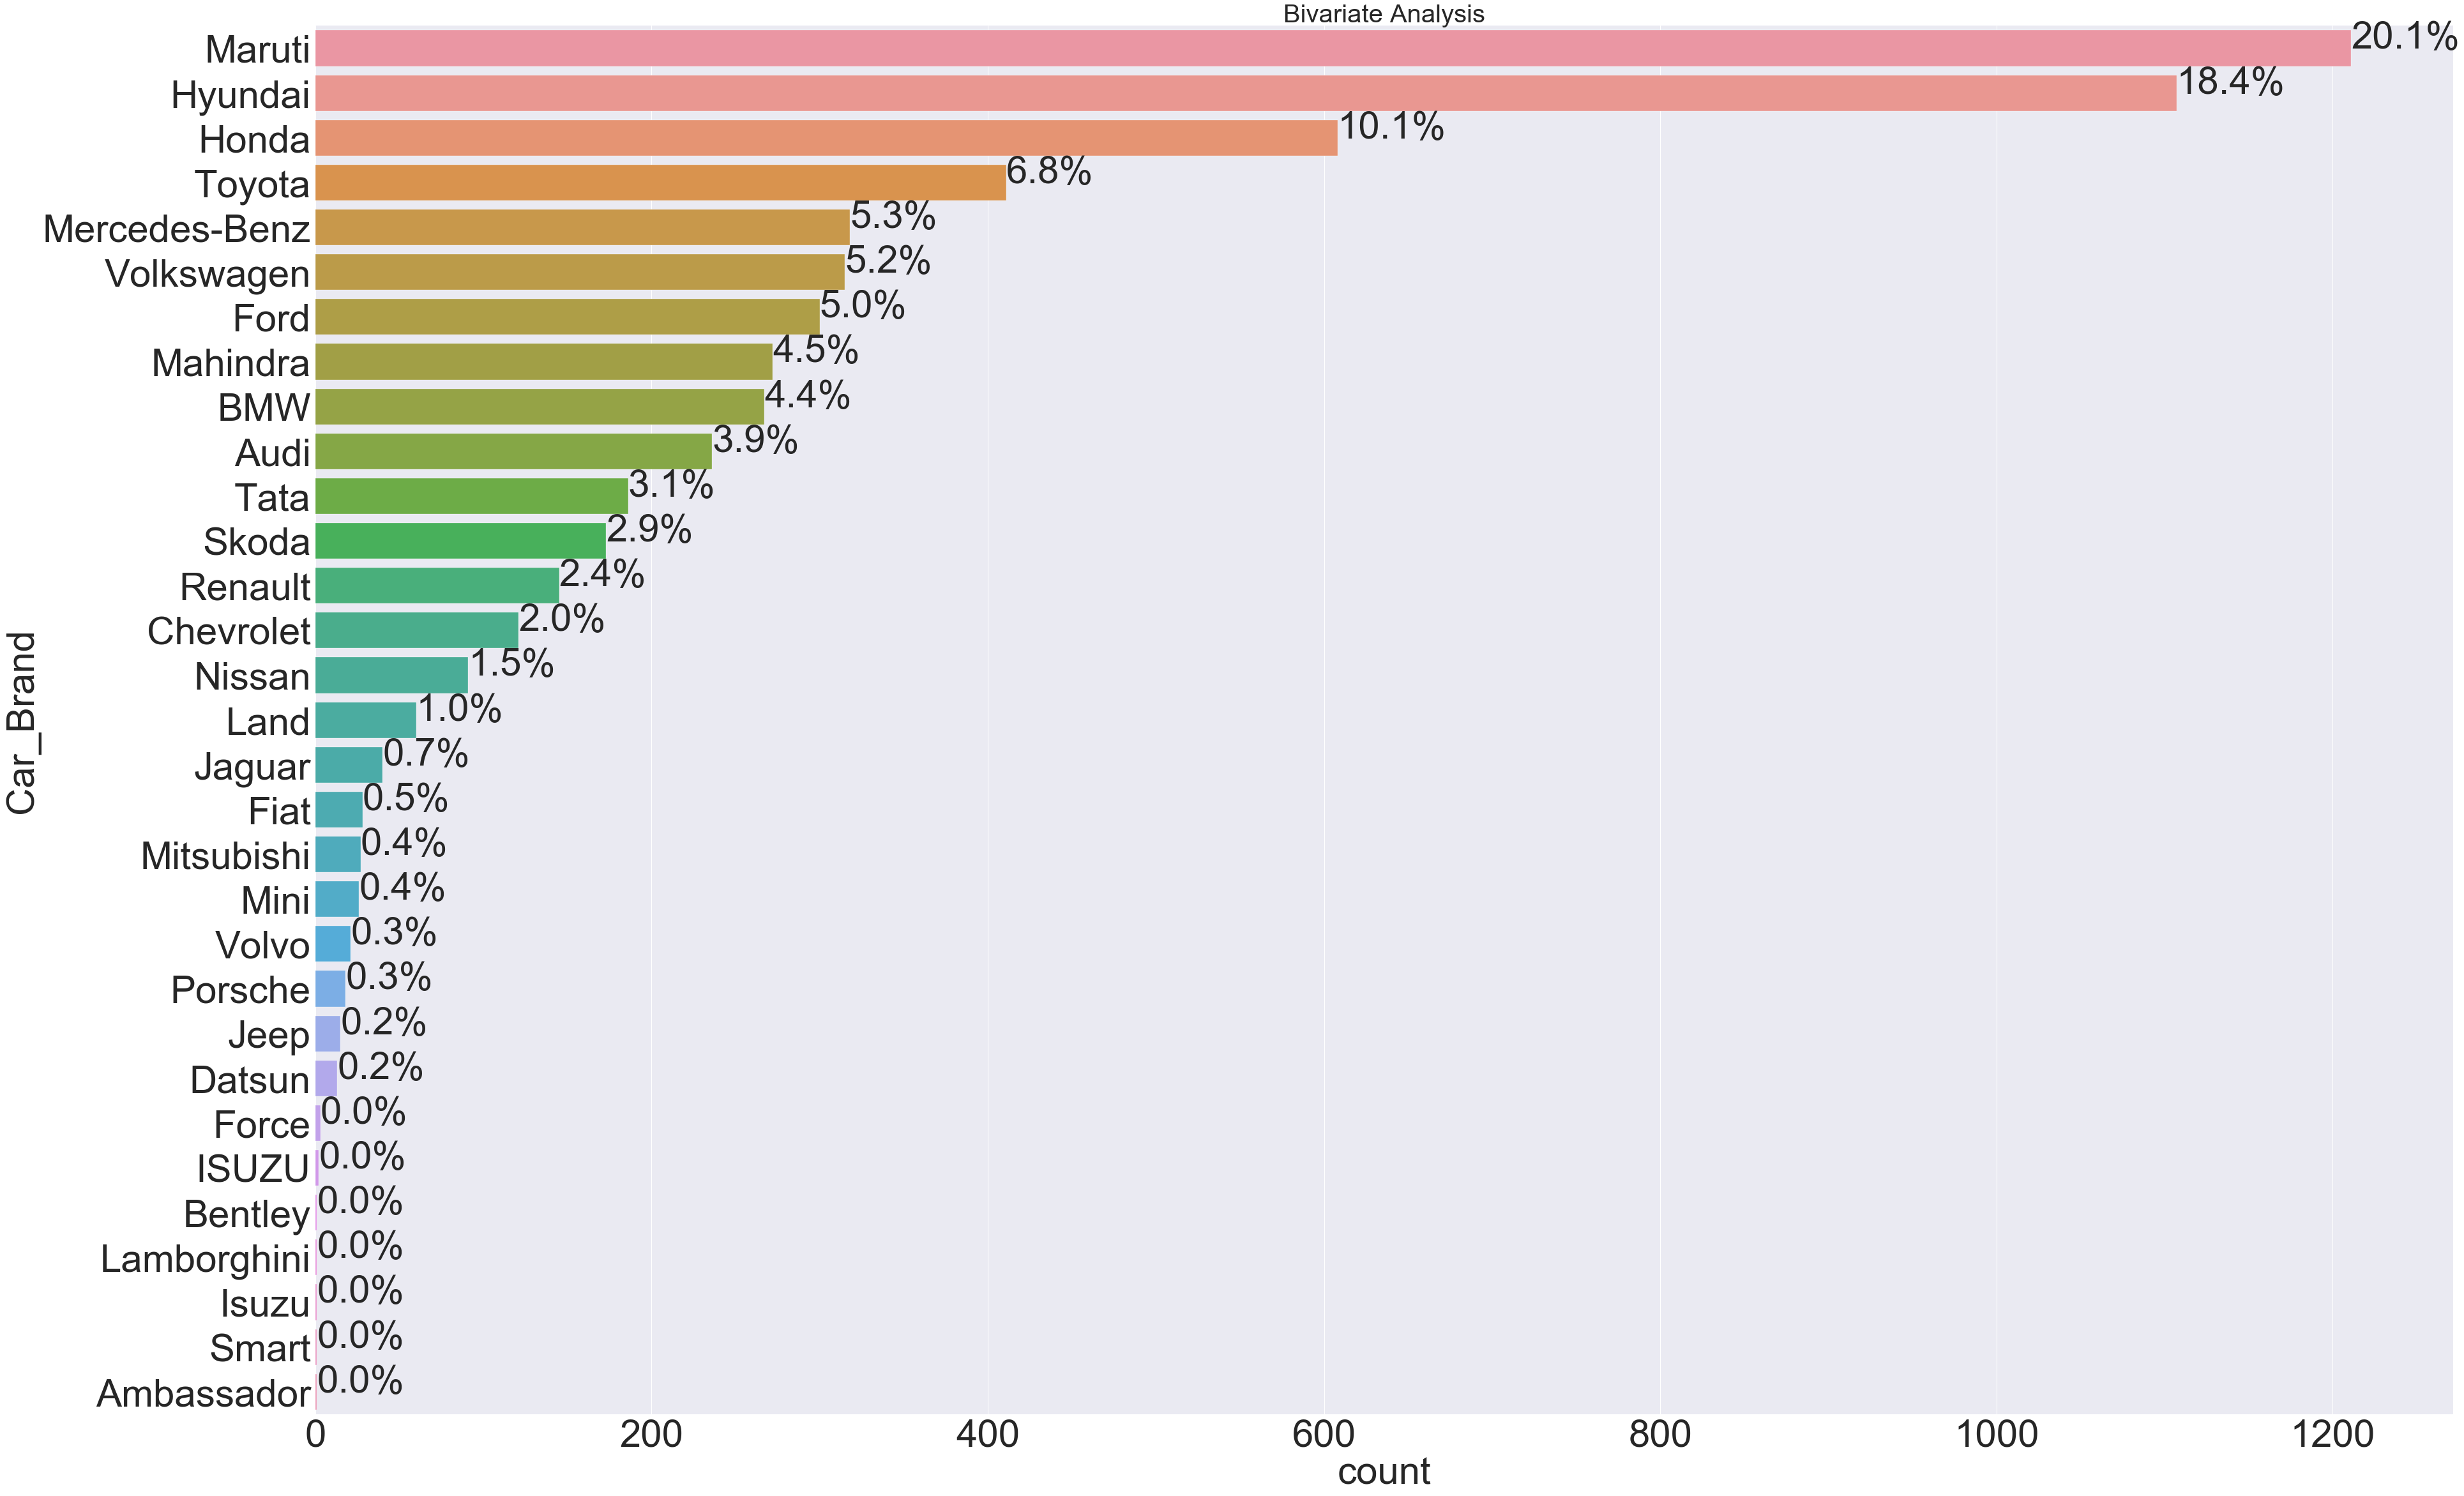

In [19]:
#Univariate analysis for categorical features
#univarite analysis with countplot with percentage distribution of datapoints

#Importing the class Graphical Analysis

#calling the function for multiple features
for col in ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Car_Brand']:
    Graphical_analysis.Categorical_data_analysis(data_categorical).univariate_analysis_categorical_countplot(col)

<blockquote>Bivariate Analysis of Categorical Features

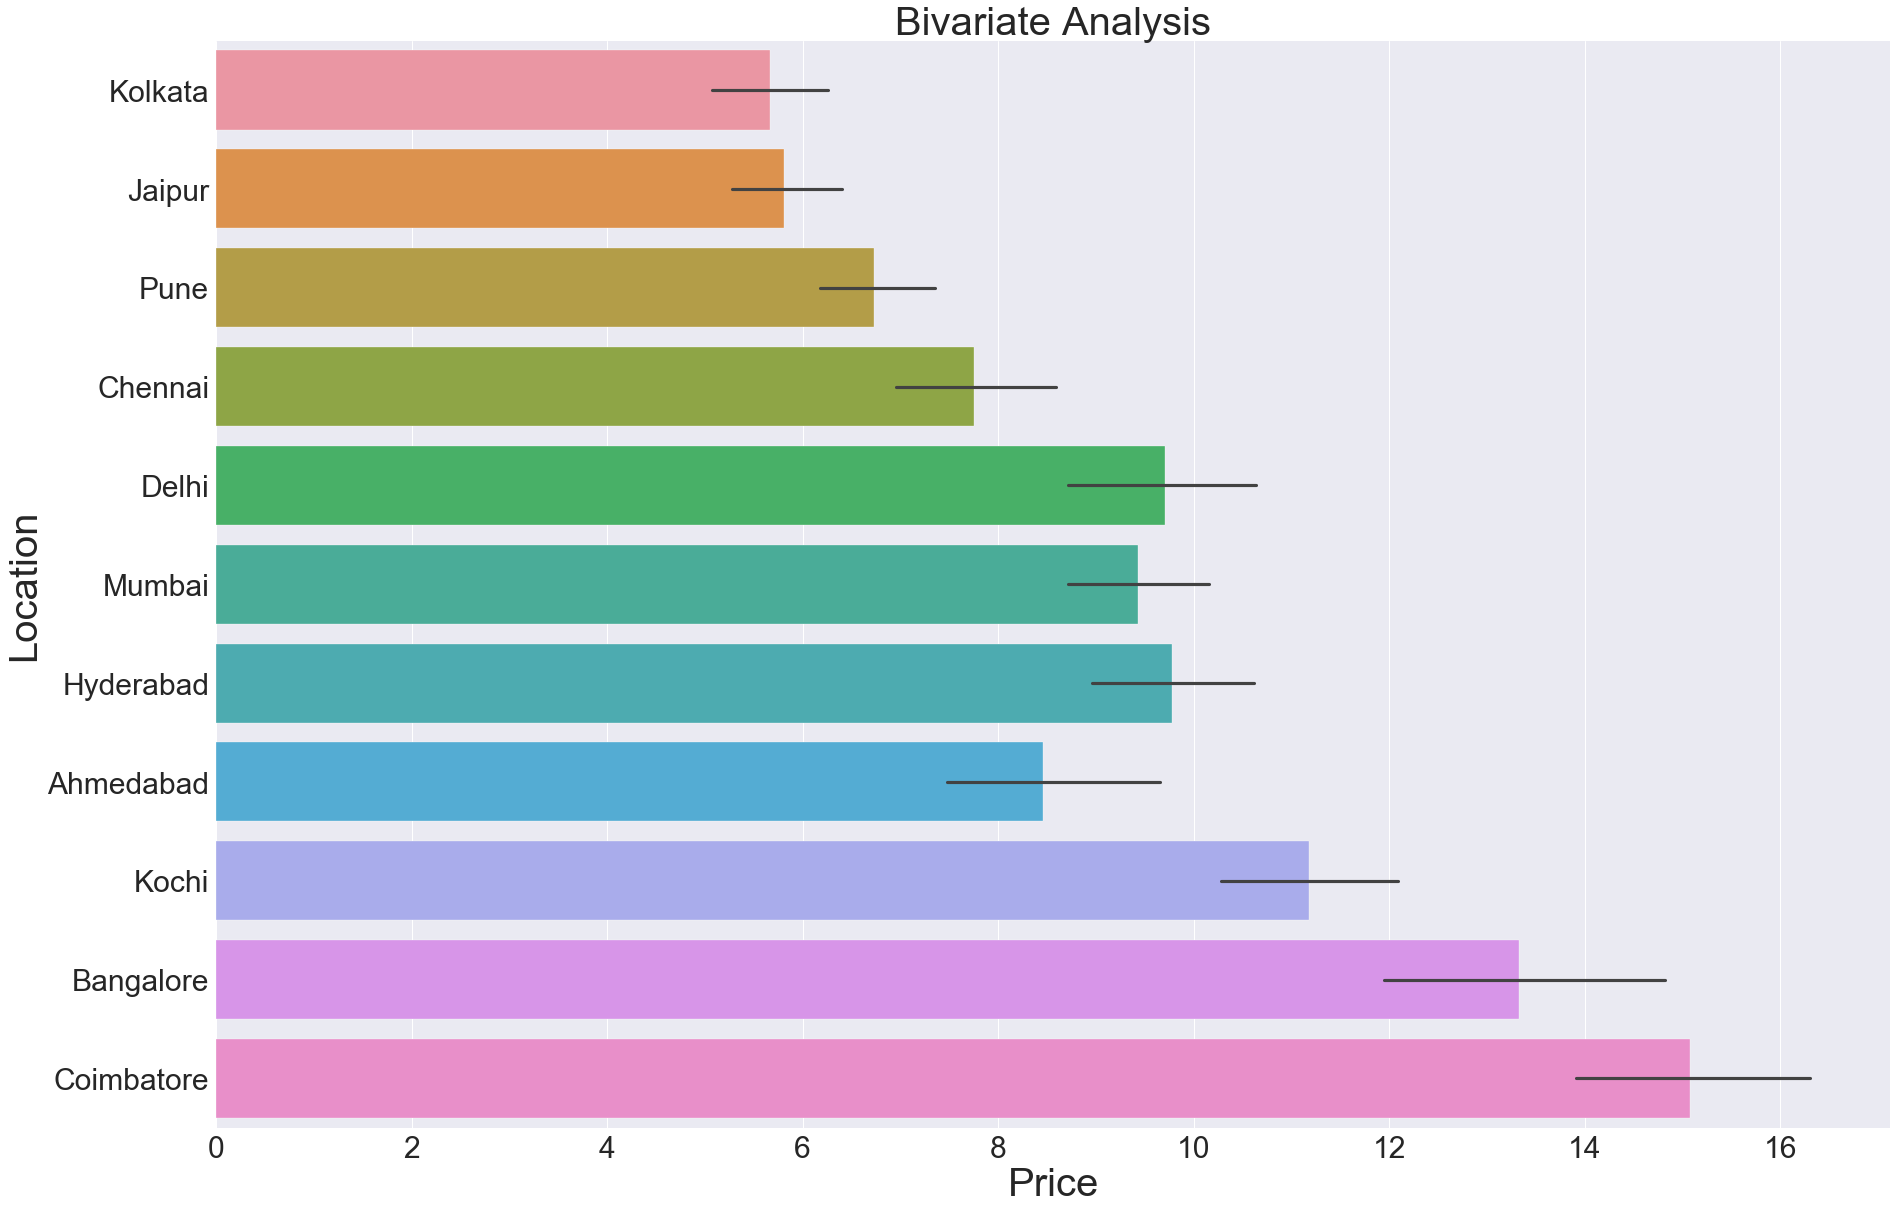

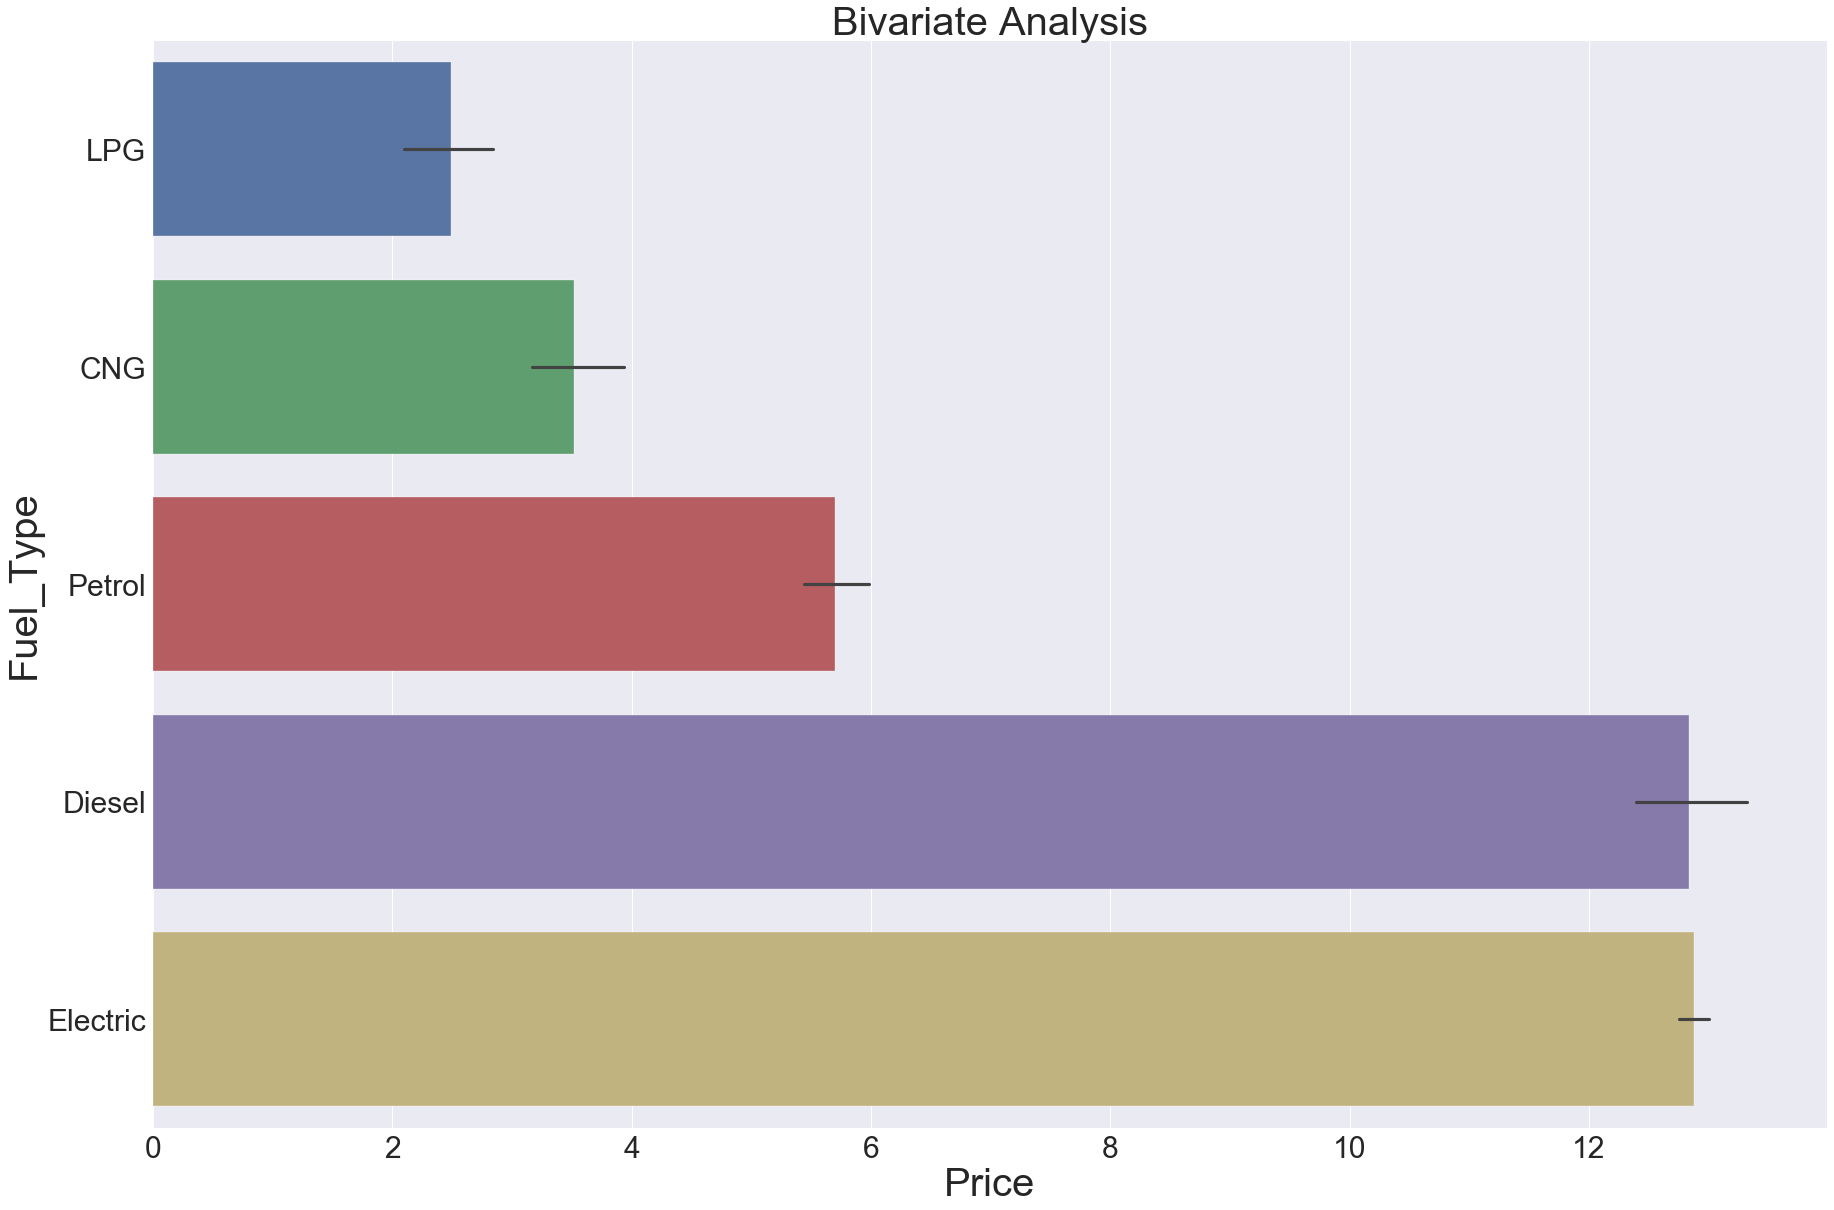

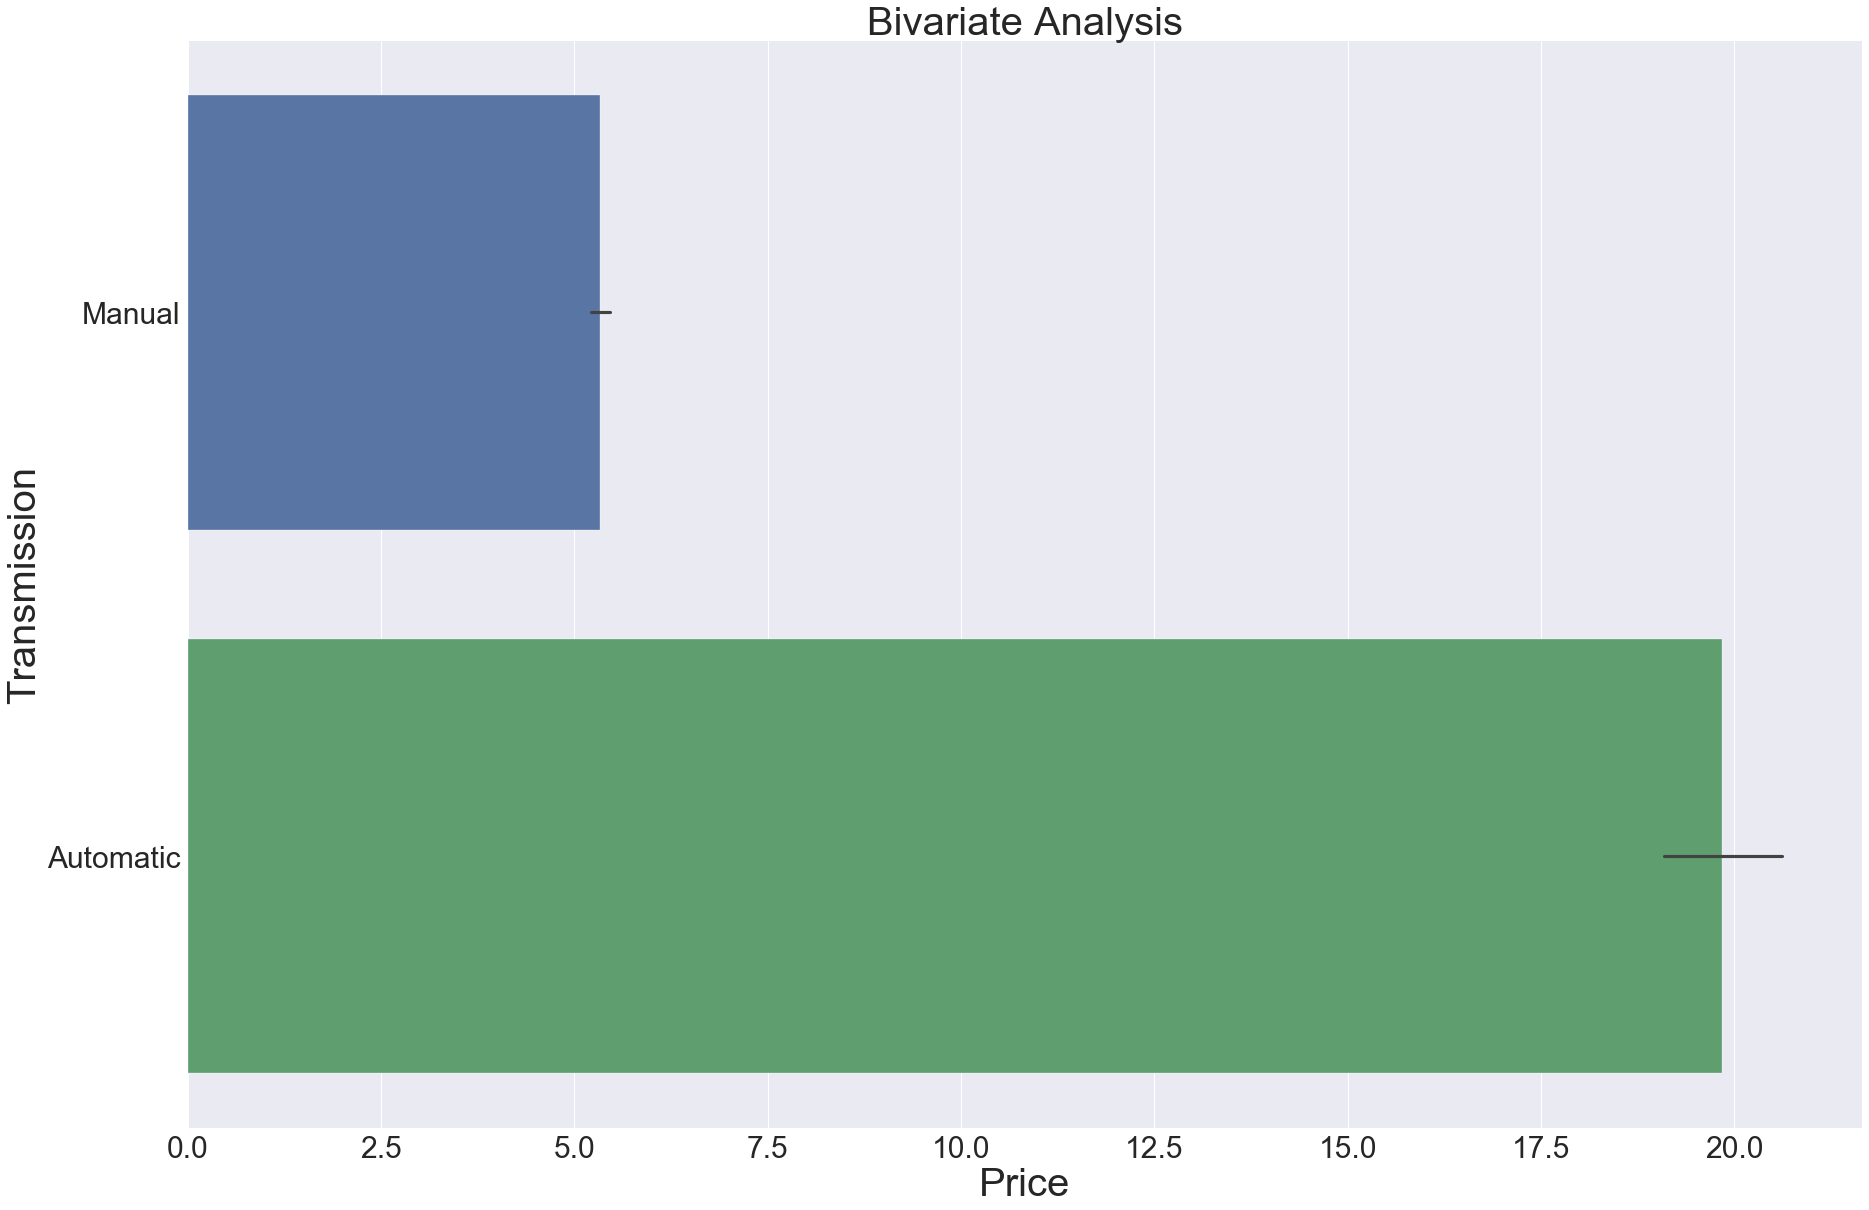

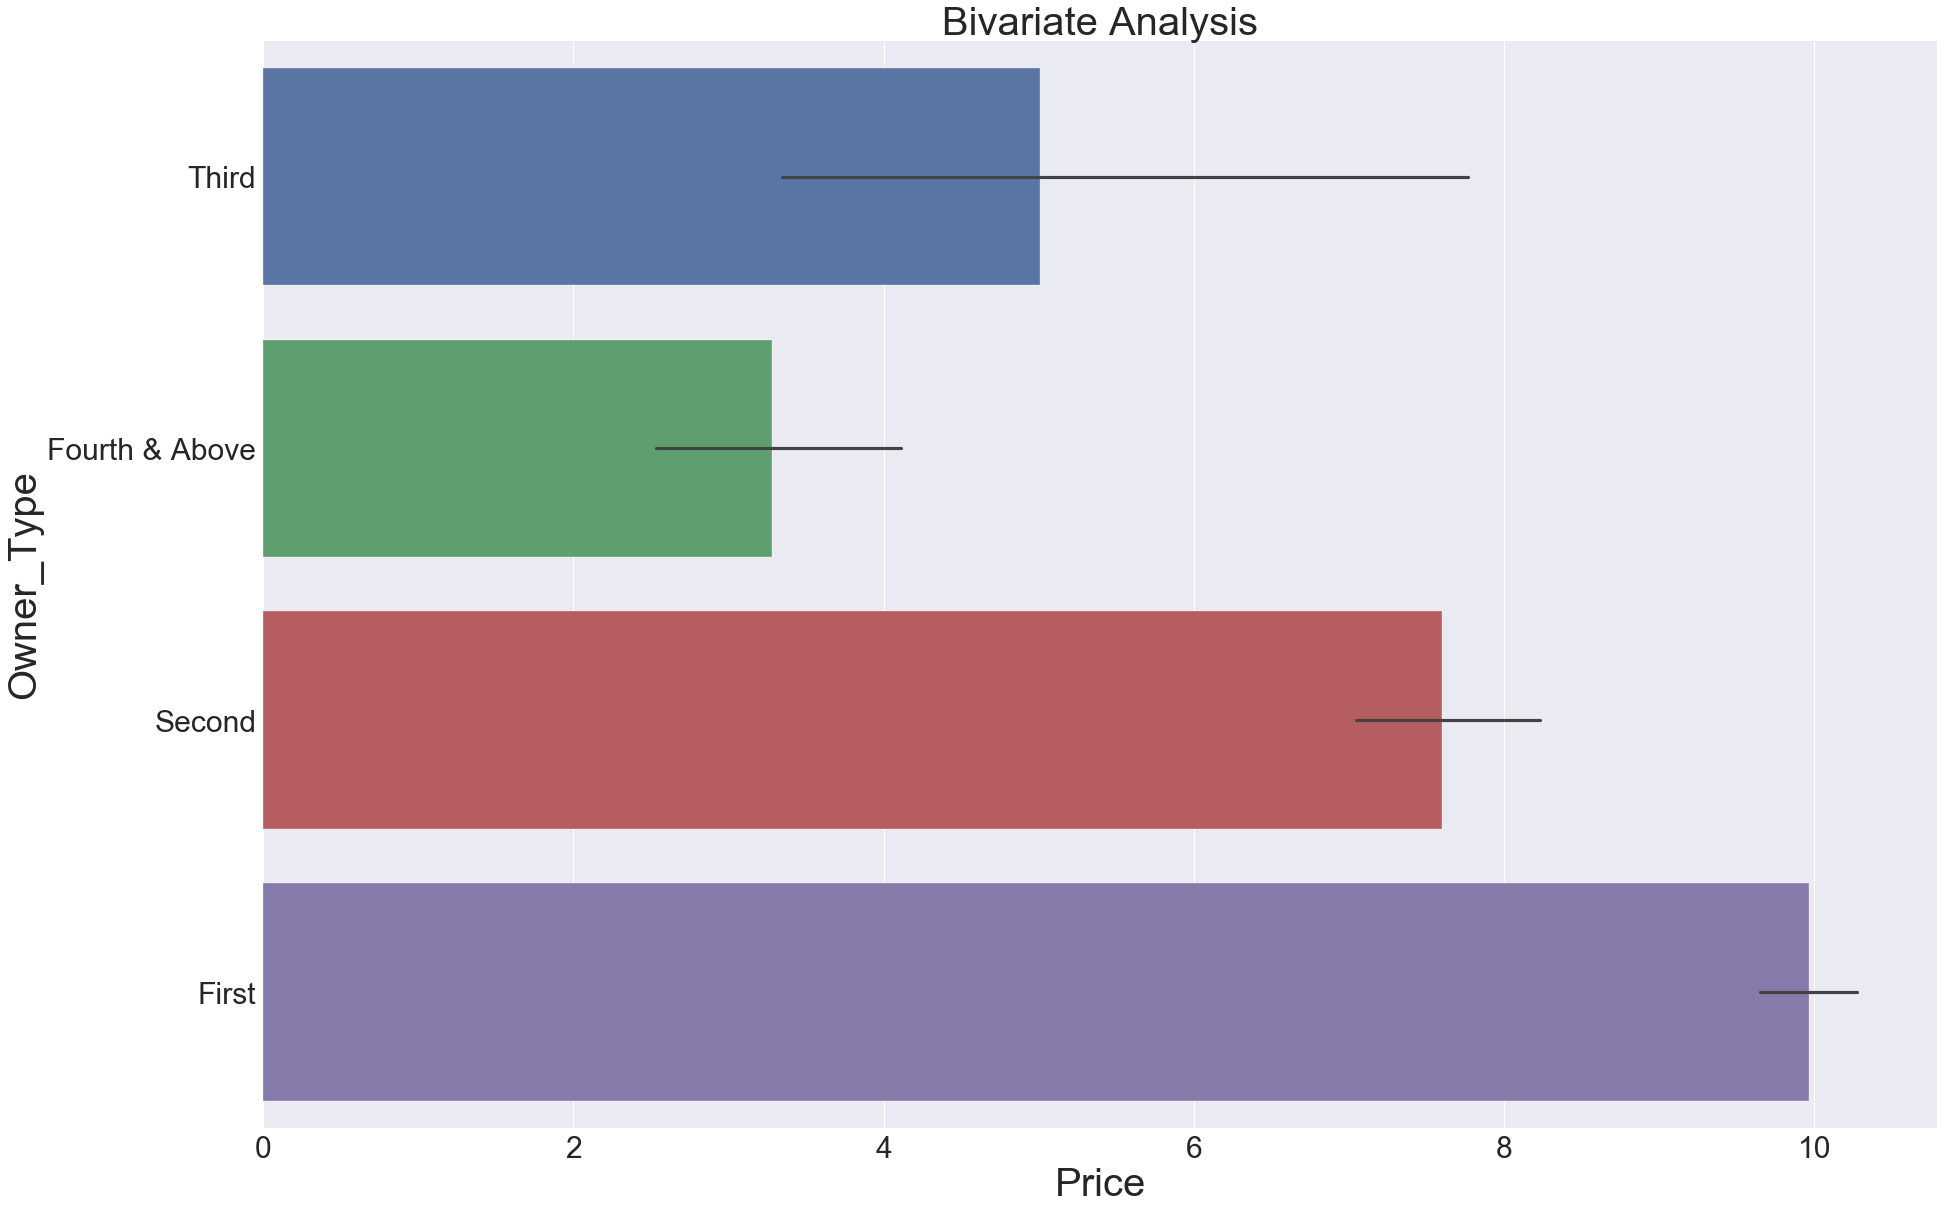

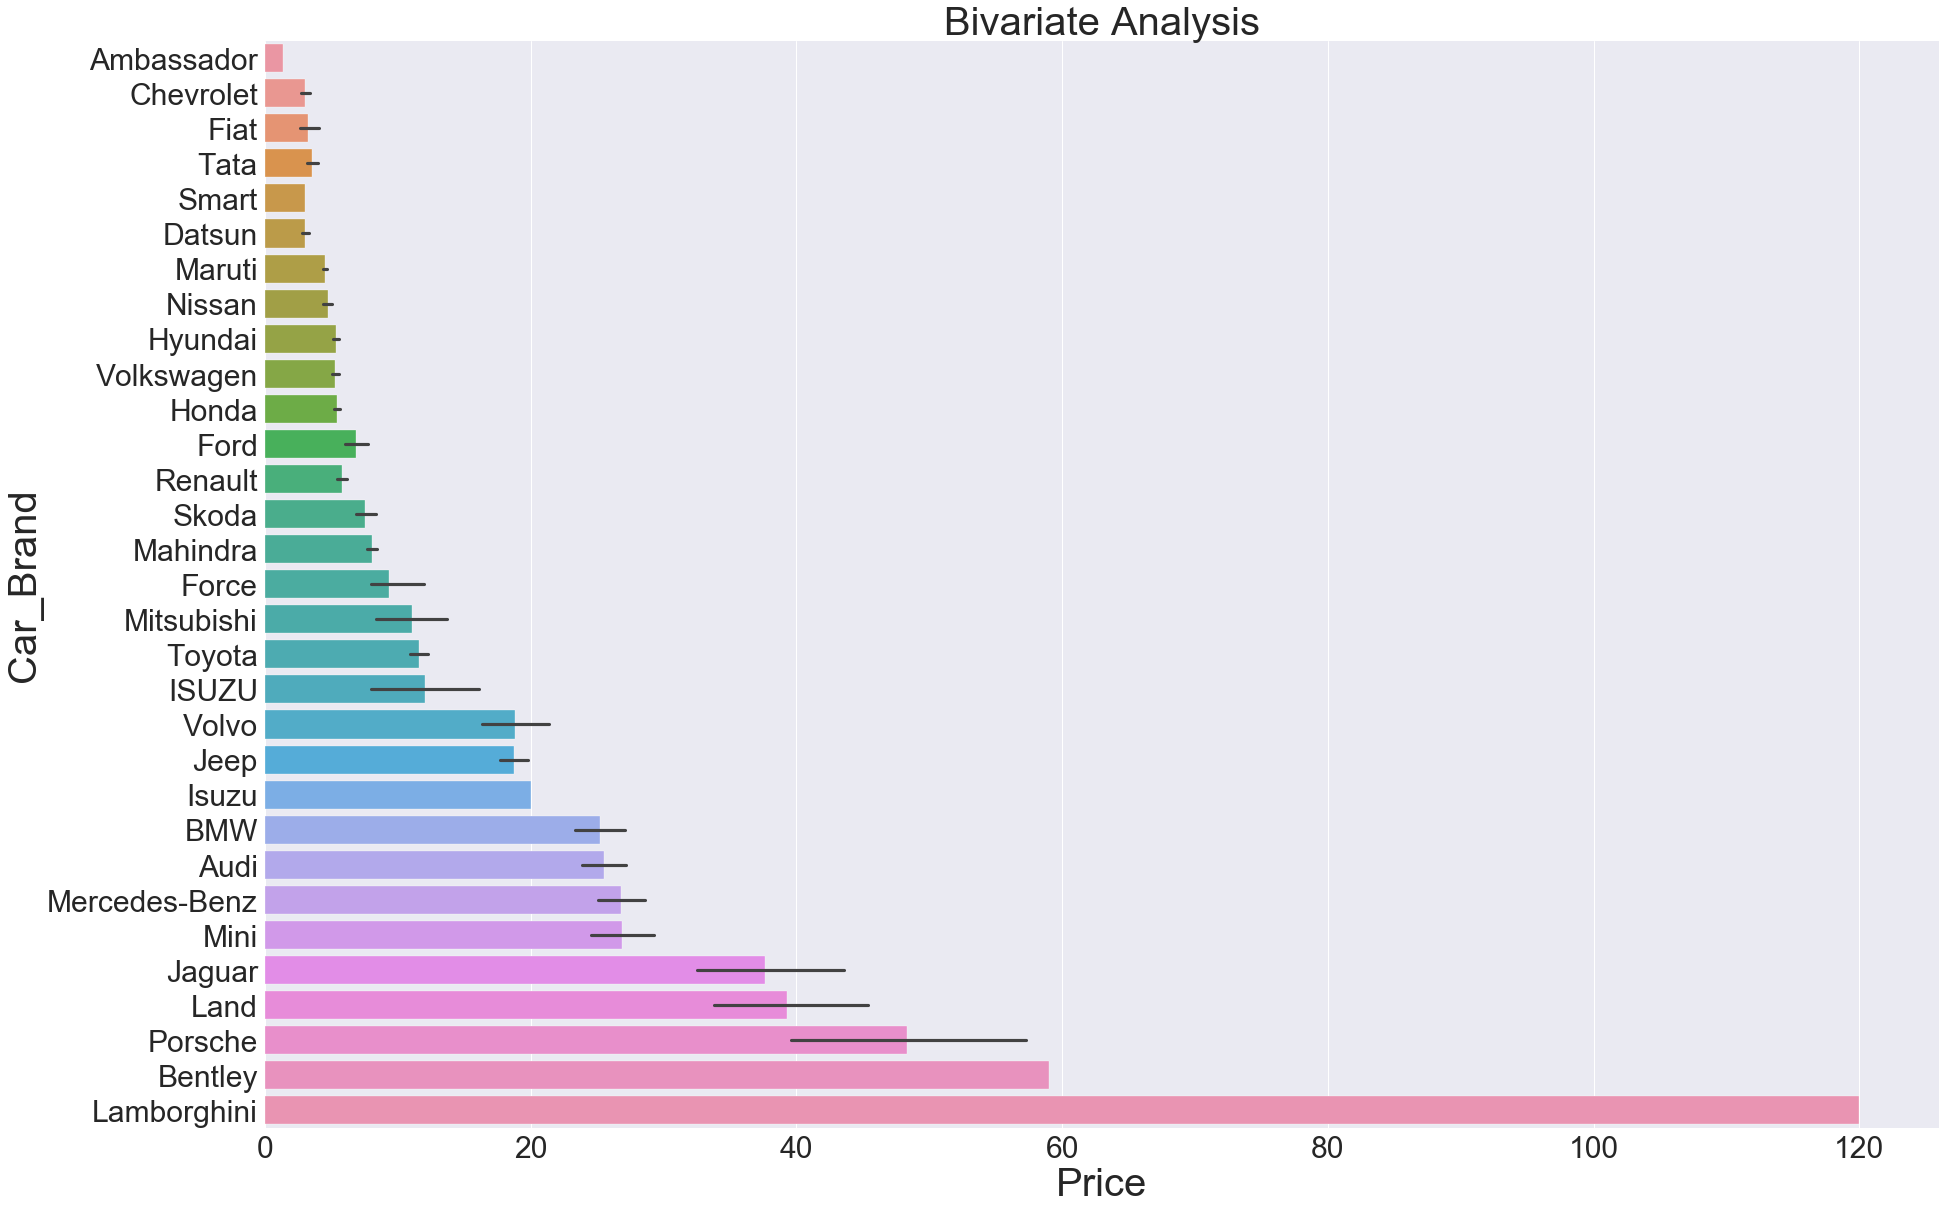

In [20]:
#Bivariate analysis numerical to categorical feature analysis

#importing the method from class


for col in ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Car_Brand']:
    Graphical_analysis.Categorical_data_analysis(data).bivarate_analysis_barplot(col,'Price',None)

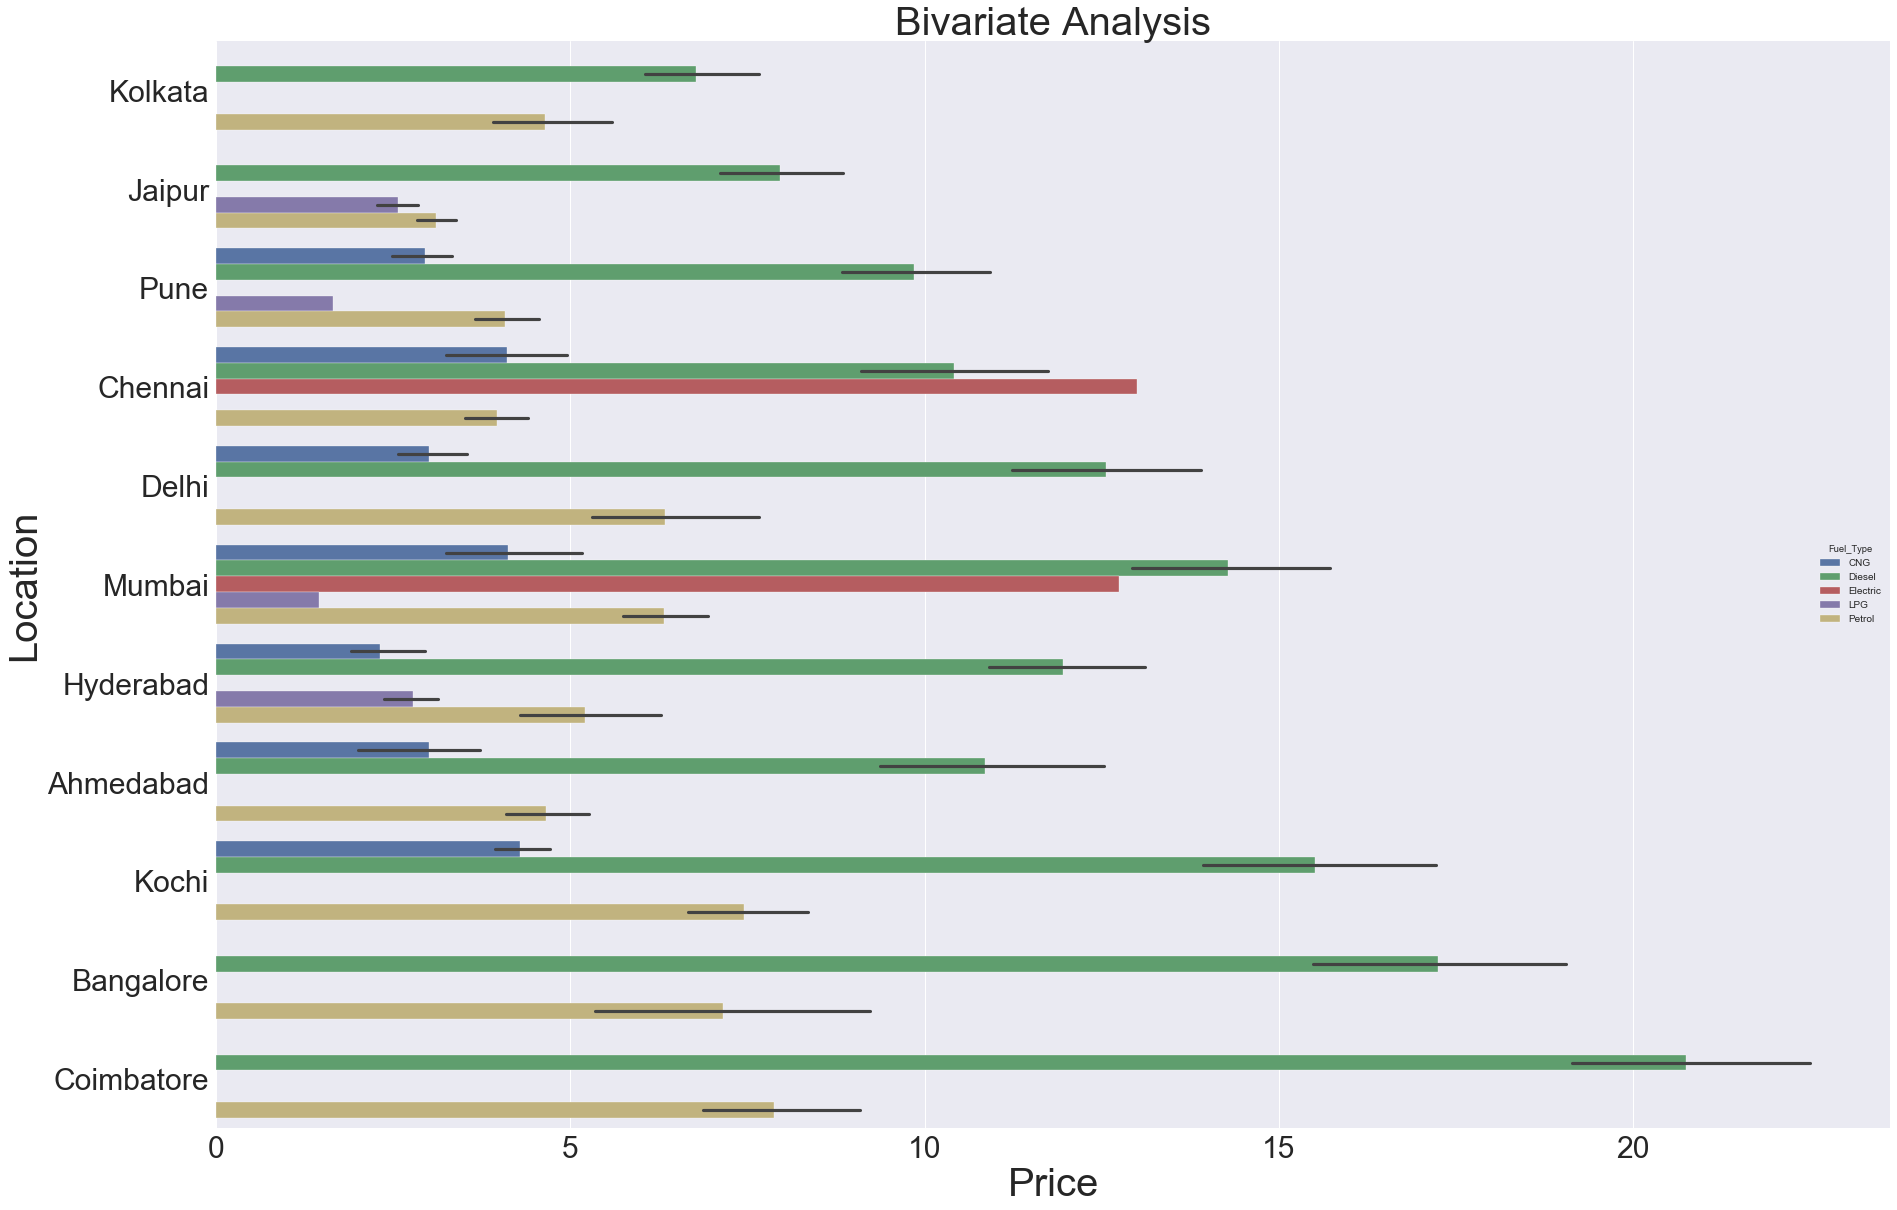

In [22]:
#Bivariate analysis numerical to categorical feature analysis

#returns the bivariate barplot
Graphical_analysis.Categorical_data_analysis(data).bivarate_analysis_barplot('Location','Price','Fuel_Type')

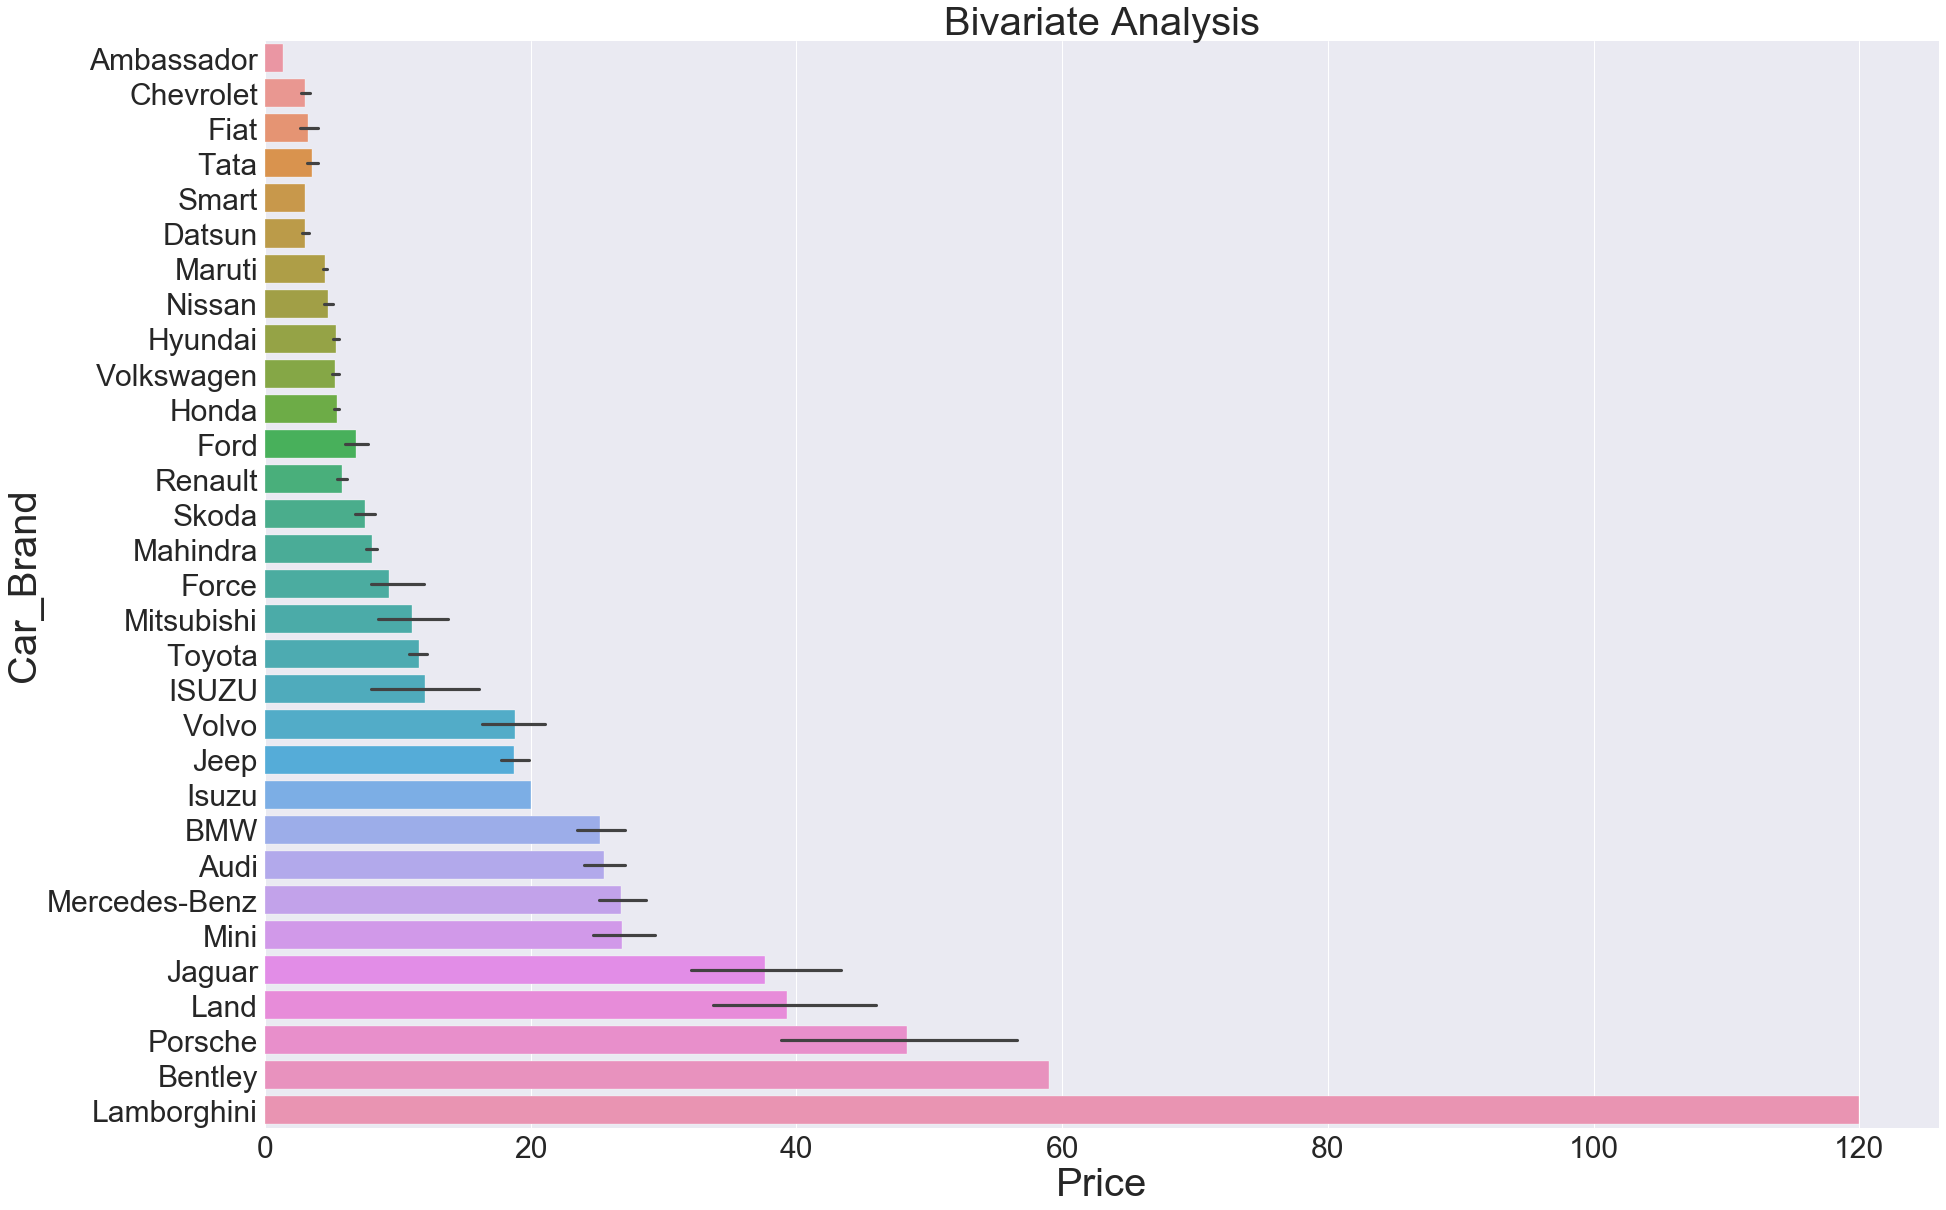

In [23]:
#Bivariate analysis numerical to categorical feature analysis

#Defining the function which takes input as a numerical and categorical feature with data
#returns the bivariate barplot
def bivarate_analysis_barplot(data,categorical_feature,numerical_feature,hue):
    plt.figure(figsize=(30,20))
    result = data.groupby([categorical_feature])[numerical_feature].aggregate(np.median).reset_index().sort_values(numerical_feature)
    b=sns.barplot(y=data[categorical_feature],x=data[numerical_feature],data=data,hue=hue,
              order=result[categorical_feature])
    b.axes.set_title('Bivariate Analysis',fontsize=40)
    b.set_xlabel(numerical_feature,fontsize=40)
    b.set_ylabel(categorical_feature,fontsize=40)
    b.tick_params(labelsize=30)
    plt.show()
    
    
#calling the function
bivarate_analysis_barplot(data,'Car_Brand','Price',None)

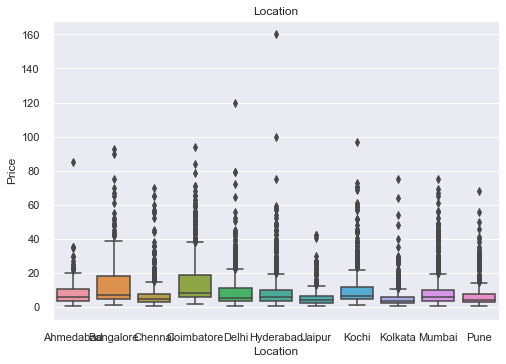

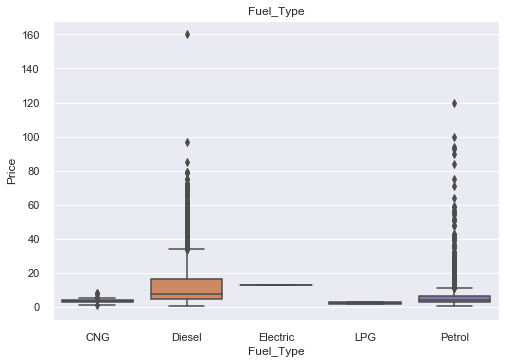

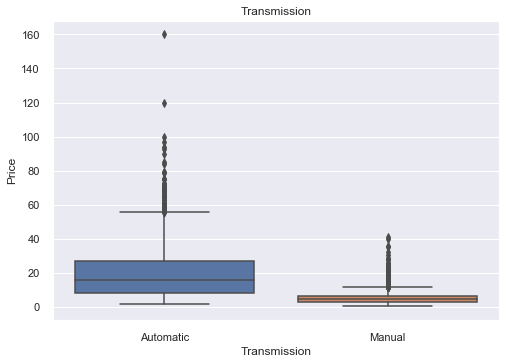

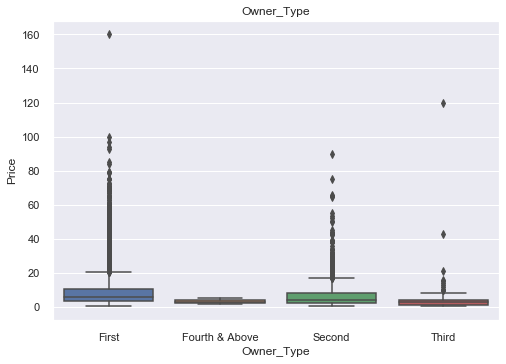

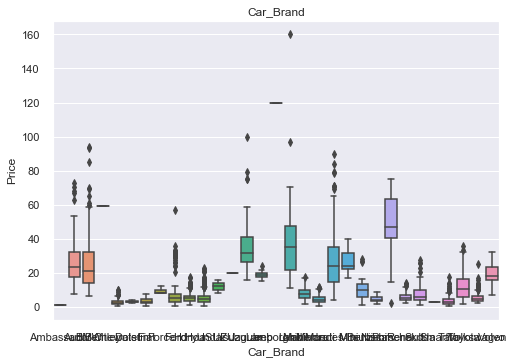

In [24]:
#Calling the predefined methods


#calling the function
for col in ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Car_Brand']:
    Graphical_analysis.Categorical_data_analysis(data).bivariate_analysis_boxplot(col,'Price')

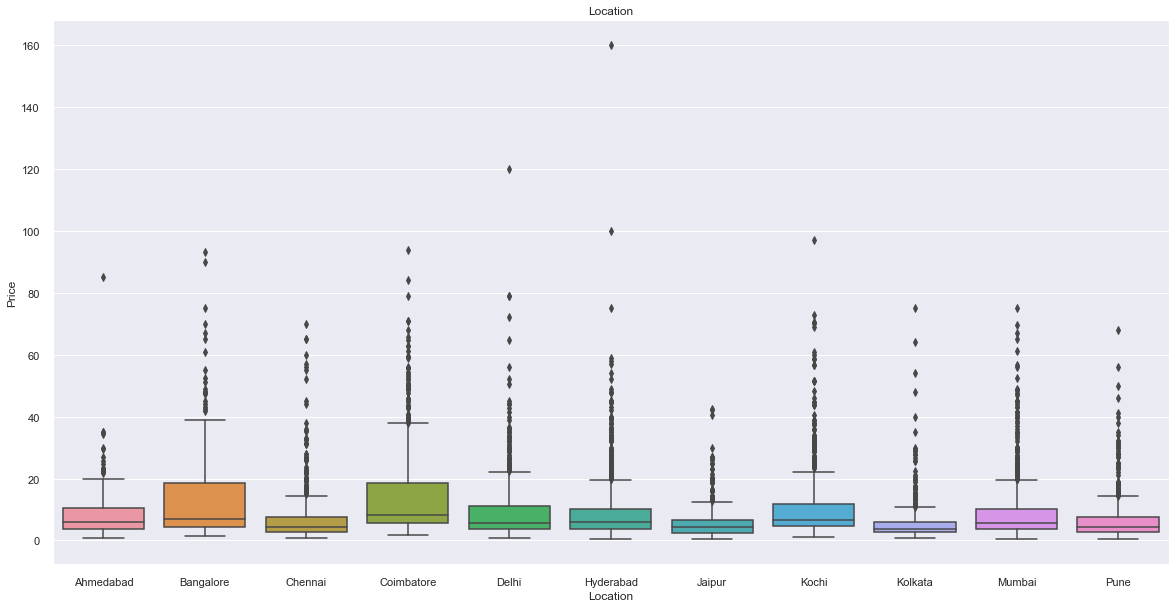

In [25]:
#Function for the bivariate analysis of features with the help of boxplot

def bivariate_analysis_boxplot(data,categorical_feature,numerical_feature):
    plt.figure(figsize=(20,10))
    sns.set(context='notebook', style='darkgrid', 
            palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

    ax=sns.boxplot(y=data[numerical_feature],x=data[categorical_feature],data=data)
    
    plt.ylabel(numerical_feature)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)  
    plt.show()
    
#calling the function
bivariate_analysis_boxplot(data,'Location','Price')

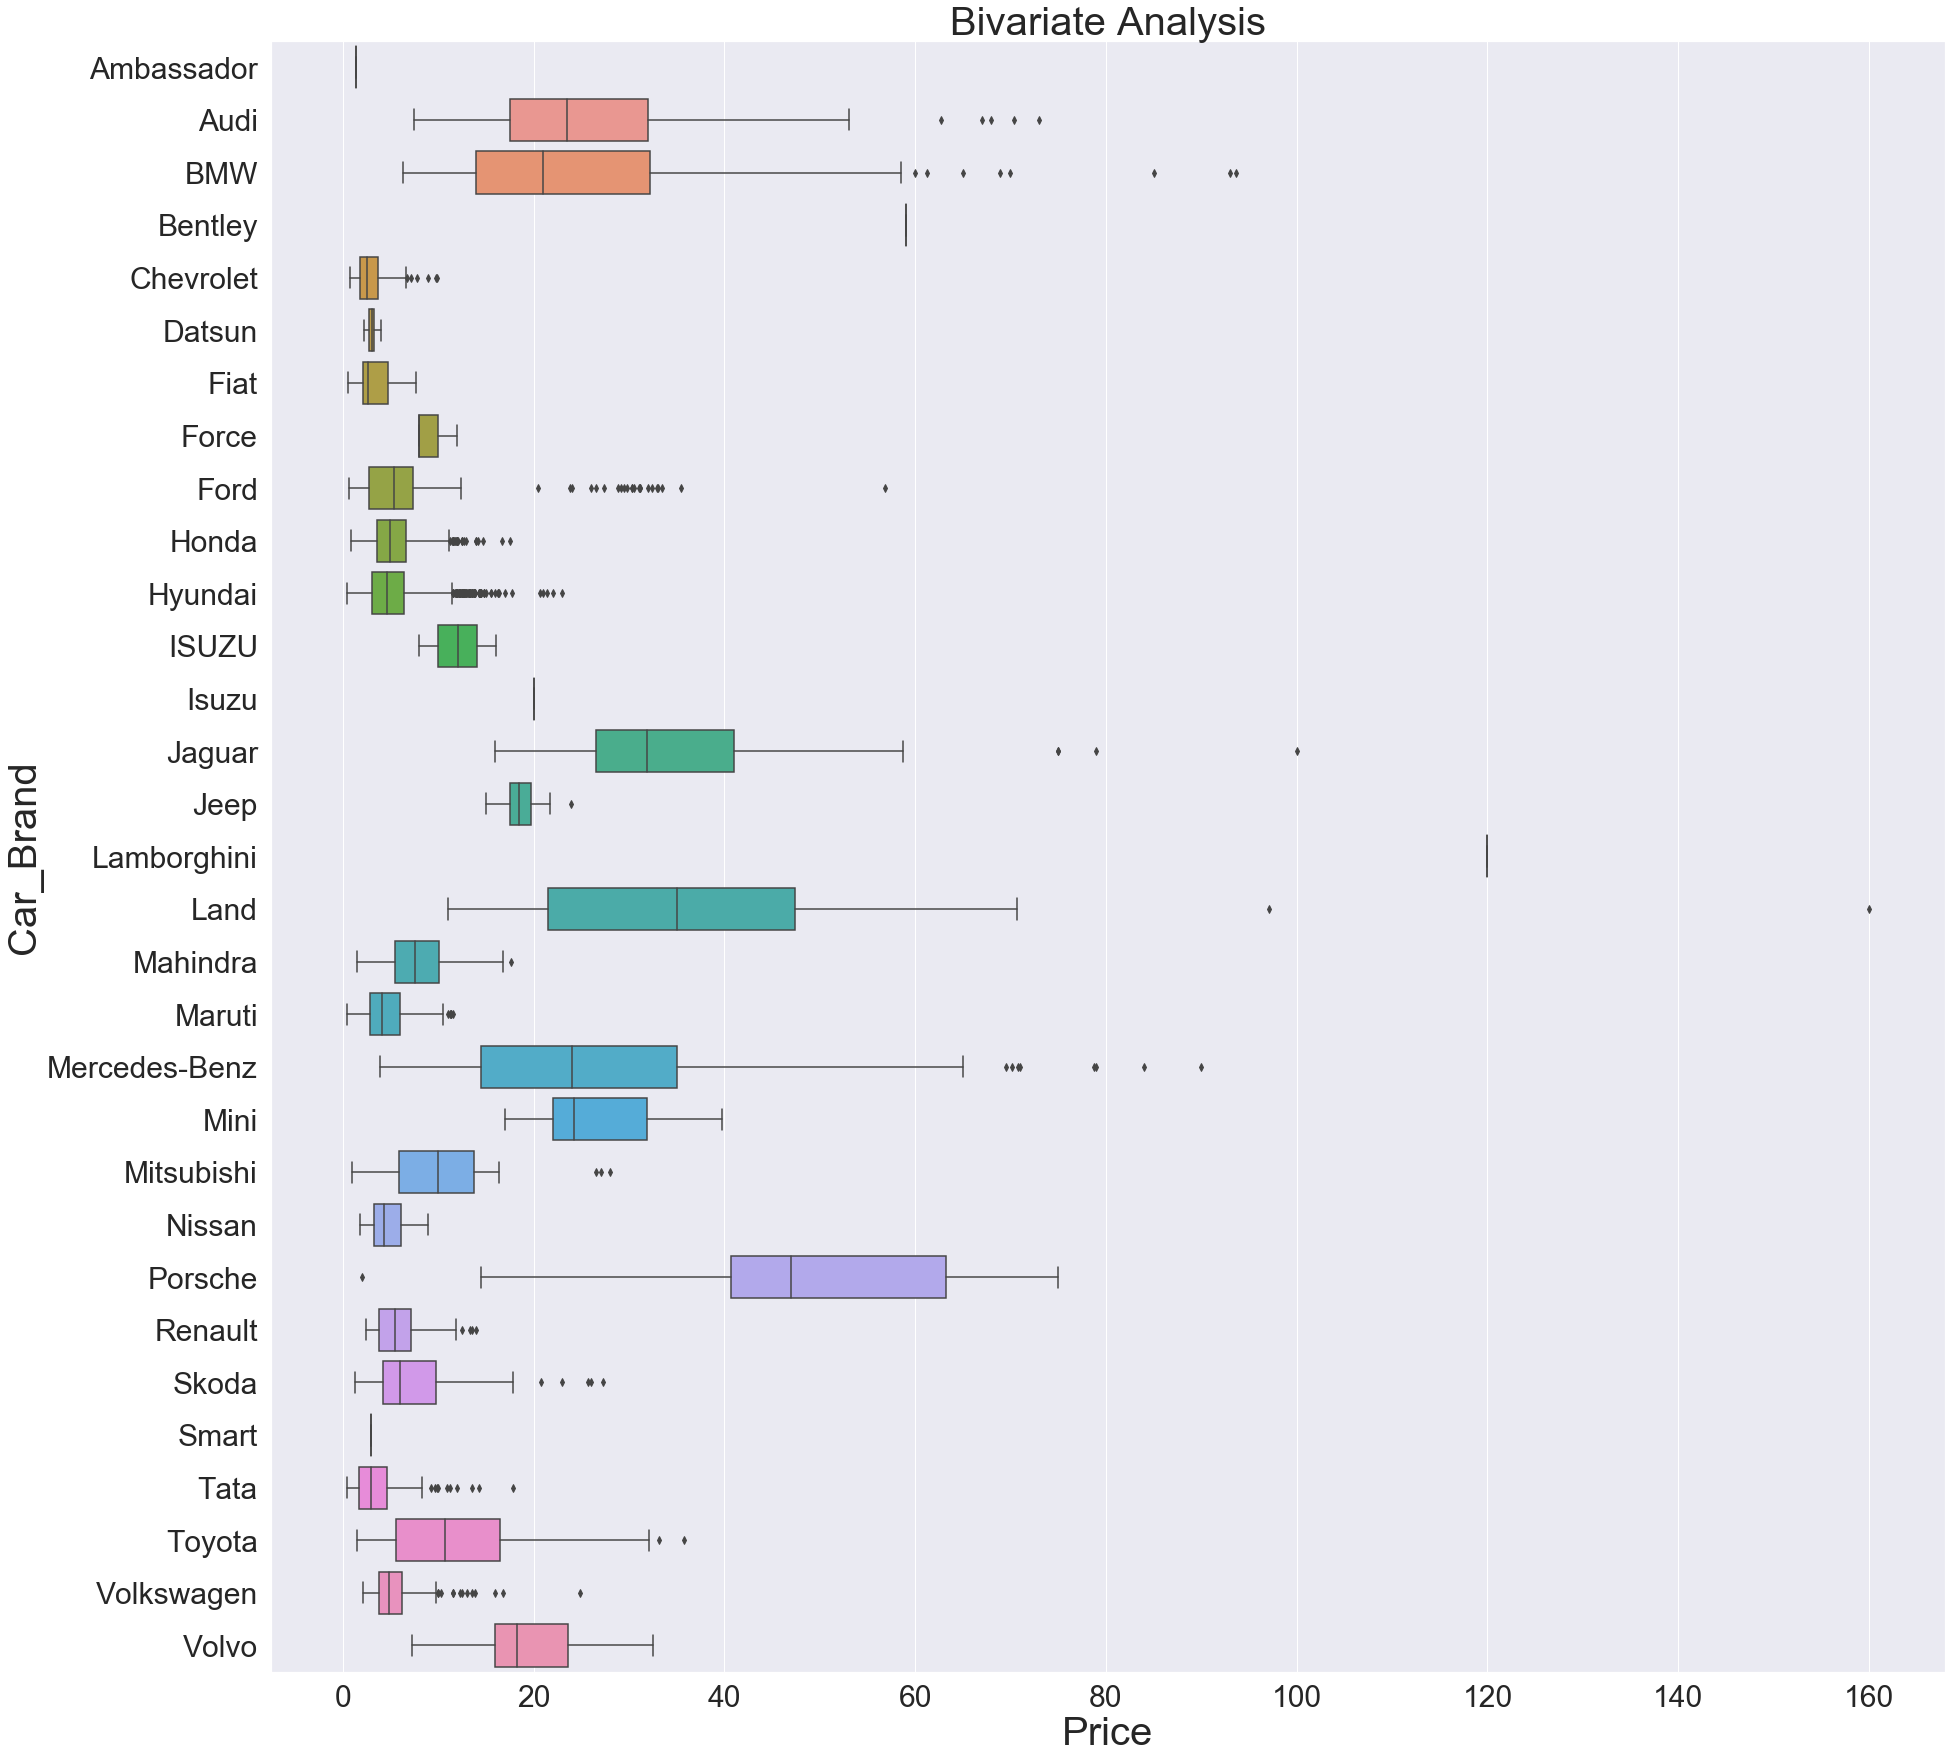

In [26]:
#Function for the bivariate analysis of features with the help of boxplot

def bivariate_analysis_boxplot(data,categorical_feature,numerical_feature):
    plt.figure(figsize=(30,30))
    sns.set(context='notebook', style='darkgrid', 
            palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

    b=sns.boxplot(x=data[numerical_feature],y=data[categorical_feature],data=data)
    b.axes.set_title('Bivariate Analysis',fontsize=40)
    b.set_xlabel(numerical_feature,fontsize=40)
    b.set_ylabel(categorical_feature,fontsize=40)
    b.tick_params(labelsize=30)
    plt.show()
    
#calling the function
bivariate_analysis_boxplot(data,'Car_Brand','Price')

In [27]:
#transformaing data to handle the outliers and making distribution normal

def data_transformation(data,feature):
    #performing cuberoot transformation
    data.loc[:,(feature)] = data.loc[:,feature]**(1/3) 
    print('Data transformaed sucessfully \n Skewness of data:')
    return(data.skew())
    
#calling the functiom
data_transformation(data_numerical,'Kilometers_Driven')

Data transformaed sucessfully 
 Skewness of data:


C:\Users\PKK\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Kilometers_Driven       1.000823
Seats                   1.842228
Price                   3.335232
Number_of_years_used    0.845802
Mileage_km/pl          -0.431814
Power_bhp               1.939649
Engine_cc               1.425742
dtype: float64

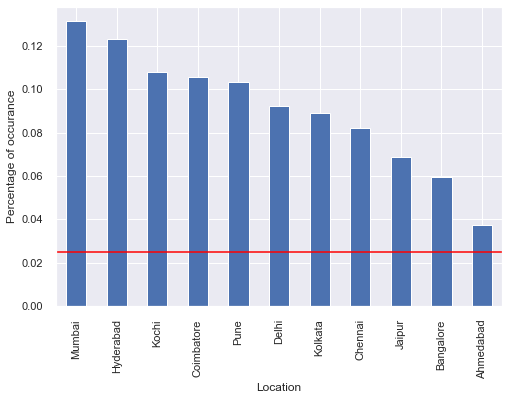

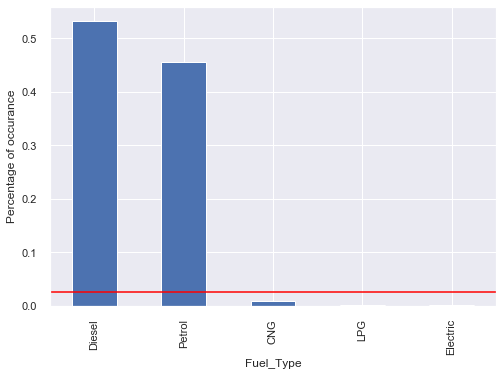

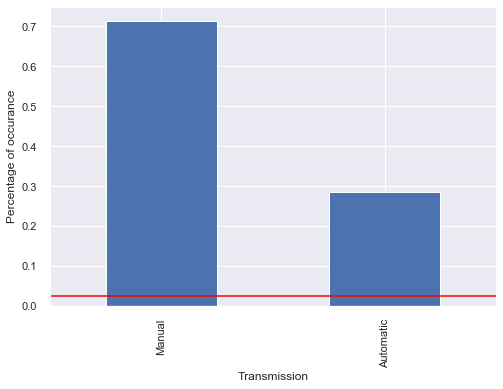

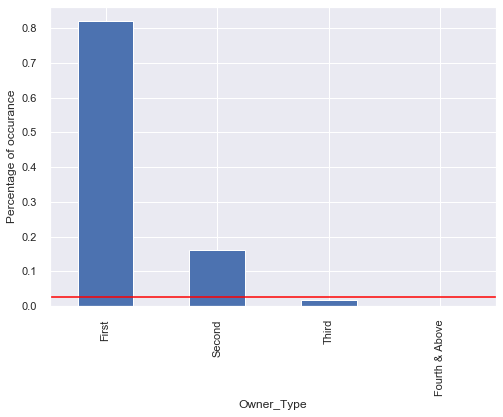

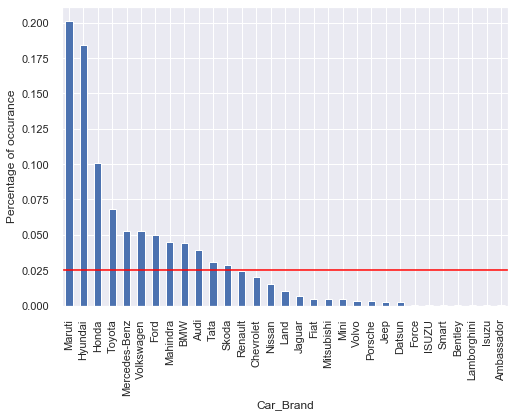

In [28]:
#Identifying the rare labels in features
#handling_rare_labels
# let's plot how frequently each label
# appears in the dataset

# in other words, the percentage of houses in the data
# with each label
def rare_labels_analysis(data,feature):
    total = len(data)
    # for each categorical variable

    temp_df = pd.Series(data[feature].value_counts() / total)

    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.025, color='red')
    fig.set_ylabel('Percentage of occurance')
    plt.show()

for col in ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Car_Brand']:
    rare_labels_analysis(data,col)

In [29]:
# I will replace all the labels that appear in less than 2.5%
# of the houses by the label 'rare'


def group_rare_labels(data, feature):
    total = len(data)
    
    temp_df = pd.Series(data[feature].value_counts() / total)

    # now I create a dictionary to replace the rare labels with the
    # string 'rare' if they are present in less than 5% of houses
    grouping_dict = {
        k: ('rare' if k not in temp_df[temp_df >= 0.025].index else k)
        for k in temp_df.index}

    # now I replace the rare categories
    tmp = data[feature].map(grouping_dict)
    return tmp

#calling the function
for col in data_categorical[['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Car_Brand']]:
    data_categorical.loc[:,col] = group_rare_labels(data_categorical, col)

In [30]:
#Count_Encoding for highly cardincal variables
def count_encoding(data,feature):
    count_map = data.loc[:,feature].value_counts().to_dict()
    data.loc[:,feature] = data.loc[:,feature].map(count_map)

#count encoding for feature car model name
count_encoding(data,'Car_Model_Name')

In [31]:
#ordinal encoding

def ordinal_encoding(data,feature,dependent_feature):
    #data=pd.concat([data_numerical,data_categorical],axis=1)
    #ordinal encoding
    ordered_labels = data.groupby([feature])[dependent_feature].mean().sort_values().index

    # next let's create a dictionary with the mappings of categories to numbers

    ordinal_mapping = {k: i for i, k in enumerate(ordered_labels, 0)}

    ordinal_mapping
    data.loc[:,feature]=data.loc[:,feature].map(ordinal_mapping)
  
#calling the function
ordinal_encoding(data,'Owner_Type','Price')
ordinal_encoding(data,'Car_Brand','Price')

In [32]:
#one hot encoding
tmp = pd.get_dummies(data[['Location','Fuel_Type','Transmission']], drop_first=True)
data.drop(columns=['Location','Fuel_Type','Transmission'],inplace=True)
data=pd.concat([tmp,data],axis=1)

In [33]:
X=data.drop(columns=['Price'])
y=data['Price']

In [34]:
#Splitting the data into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75)

In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)